# Insurance Fraud Detection Exploratory Data Analysis  
*Prepared by **Gaurav Nemani***  

---

In [173]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# Setting a few set-options

# Do not truncate print statements
pd.set_option('display.max_columns', None)

In [175]:
df=pd.read_csv('freMPL6.csv')
df_original=df.copy(deep=True)

In [176]:
print(df.shape)
df.columns

(42400, 21)


Index(['Exposure', 'LicAge', 'RecordBeg', 'RecordEnd', 'Gender', 'MariStat',
       'SocioCateg', 'VehUsage', 'DrivAge', 'HasKmLimit', 'ClaimAmount',
       'ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft',
       'ClaimNbWindscreen', 'OutUseNb', 'RiskArea', 'BonusMalus', 'ClaimInd',
       'DrivAgefactor'],
      dtype='object')

Attribute 	        Type 	    Description

Exposure 	        Numeric 	The exposure, in years

LicAge 	            Numeric 	The driving license age, in months

RecordBeg 	        Date 	    Beginning date of record

RecordEnd 	        Date 	    End date of record

Gender 	            Factor 	    Gender of the driver, either “Male” or “Female”

MariStat 	        Factor 	    Marital status of the driver, either “Alone” or “Other”

SocioCateg 	        Factor 	    Socio-economic category of the driver, known as CSP in France, between “CSP1” and “CSP99”

VehUsage 	        Factor 	    Usage of the vehicle, among “Private”, “Private+trip to office”, “Professional”, “Professional run”

DrivAge 	        Numeric 	Age of the driver, in years

HasKmLimit 	        Boolean 	Indicator if there’s a mileage limit for the policy, 1 if yes, 0 otherwise

ClaimAmount 	    Numeric 	Total claim amount of the guarantee

ClaimNbResp 	    Numeric 	Number of responsible claims in the 4 preceding years

ClaimNbNonResp  	Numeric 	Number of non-responsible claims in the 4 preceding years

ClaimNbParking 	    Numeric 	Number of parking claims in the 4 preceding years

ClaimNbFireTheft 	Numeric 	Number of fire-theft claims in the 4 preceding years

ClaimNbWindscreen 	Numeric 	Number of windscreen claims in the 4 preceding years

OutUseNb 	        Numeric 	Number of out-of-use instances in the 4 preceding years

RiskArea 	        Numeric 	Unknown risk area, between 1 and 13, possibly ordered

BonusMalus 	        Numeric 	Bonus-malus coefficient, between 50 and 350: <100 means bonus, >100 means malus in France

ClaimInd 	        Boolean 	Claim indicator of the guarantee (this is not the claim number)

In [177]:
df.head(3)

,Exposure,LicAge,RecordBeg,RecordEnd,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,ClaimAmount,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea,BonusMalus,ClaimInd,DrivAgefactor
0,0.333,468,2004-01-01,2004-05-01,Male,Other,CSP50,Private,67,0,0.0,1,0,0,0,0,0,9,50,0,50-70
1,0.666,472,2004-05-01,NaN,Male,Other,CSP50,Private,68,0,0.0,1,0,0,0,0,0,9,50,0,50-70
2,0.207,169,2004-01-01,2004-03-16,Male,Other,CSP50,Private+trip to office,32,0,0.0,0,2,0,0,0,0,7,72,0,25-40


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42400 entries, 0 to 42399
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Exposure           42400 non-null  float64
 1   LicAge             42400 non-null  int64  
 2   RecordBeg          42400 non-null  object 
 3   RecordEnd          22631 non-null  object 
 4   Gender             42400 non-null  object 
 5   MariStat           42400 non-null  object 
 6   SocioCateg         42400 non-null  object 
 7   VehUsage           42400 non-null  object 
 8   DrivAge            42400 non-null  int64  
 9   HasKmLimit         42400 non-null  int64  
 10  ClaimAmount        42400 non-null  float64
 11  ClaimNbResp        42400 non-null  int64  
 12  ClaimNbNonResp     42400 non-null  int64  
 13  ClaimNbParking     42400 non-null  int64  
 14  ClaimNbFireTheft   42400 non-null  int64  
 15  ClaimNbWindscreen  42400 non-null  int64  
 16  OutUseNb           424

In [179]:
print(df.describe())

           Exposure        LicAge       DrivAge    HasKmLimit    ClaimAmount  \
count  42400.000000  42400.000000  42400.000000  42400.000000   42400.000000   
mean       0.461361    331.133608     49.042476      0.067689     206.879531   
std        0.288625    159.079914     14.799799      0.251214    1863.621474   
min        0.001000     24.000000     20.000000      0.000000   -1947.619940   
25%        0.217000    198.000000     37.000000      0.000000       0.000000   
50%        0.438000    327.500000     49.000000      0.000000       0.000000   
75%        0.719000    450.000000     59.000000      0.000000       0.000000   
max        1.000000    875.000000     96.000000      1.000000  163427.013897   

        ClaimNbResp  ClaimNbNonResp  ClaimNbParking  ClaimNbFireTheft  \
count  42400.000000    42400.000000    42400.000000      42400.000000   
mean       0.273679        0.336958        0.086722          0.078585   
std        0.537783        0.619785        0.308459         

In [180]:
df.isnull().sum()

Exposure                 0
LicAge                   0
RecordBeg                0
RecordEnd            19769
Gender                   0
MariStat                 0
SocioCateg               0
VehUsage                 0
DrivAge                  0
HasKmLimit               0
ClaimAmount              0
ClaimNbResp              0
ClaimNbNonResp           0
ClaimNbParking           0
ClaimNbFireTheft         0
ClaimNbWindscreen        0
OutUseNb                 0
RiskArea                 0
BonusMalus               0
ClaimInd                 0
DrivAgefactor            0
dtype: int64

ClaimInd
0    38186
1     4214
Name: count, dtype: int64

percentage of fraud cases: 9.94%

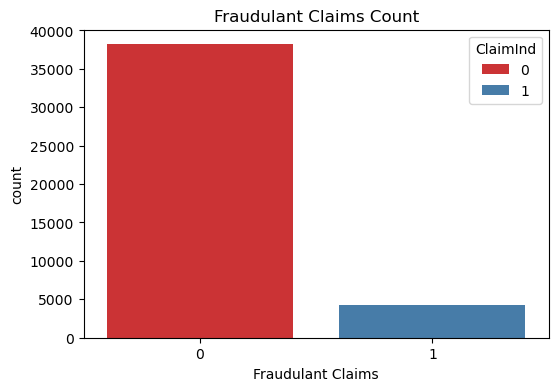

In [181]:
# Percentage of fraud cases
print(df['ClaimInd'].value_counts())
fraud_cases = df['ClaimInd'].value_counts().get(1, 0)
total_cases = df['ClaimInd'].count()
fraud_percentage = round((fraud_cases / total_cases) * 100, 2)
print('\npercentage of fraud cases: '+str(fraud_percentage), end='%')

# Visual Distribution of fraud cases
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ClaimInd', hue='ClaimInd', palette='Set1')
plt.xlabel('Fraudulant Claims')
plt.title('Fraudulant Claims Count')
plt.show()

Low number of fraud cases, 4214 out of 42400, making it only 9.94% of the total cases. {Dataset is imbalanced}

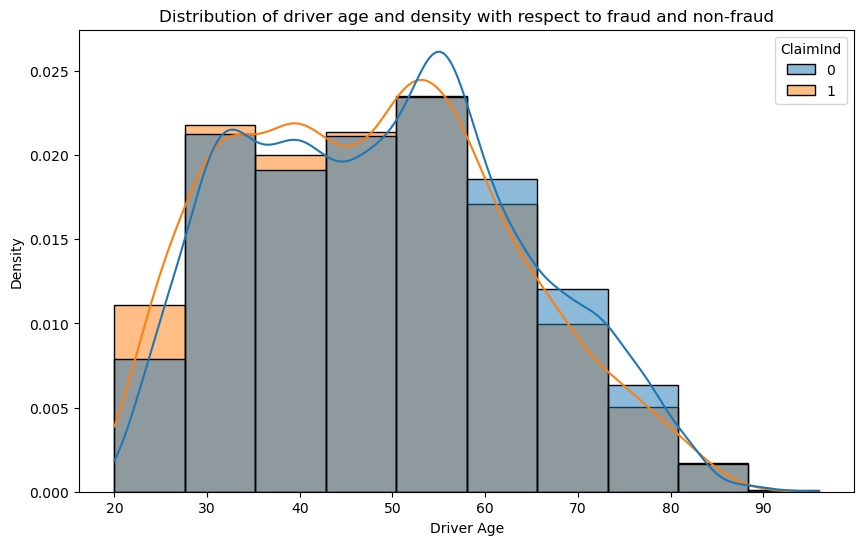

In [182]:
#distribution of driver age and density with respect to fraud and non-fraud
plt.figure(figsize=(10,6))
den_plot_ageFraud = sns.histplot(data=df, x='DrivAge', hue='ClaimInd', bins=10, kde=True, stat='density', common_norm=False)
den_plot_ageFraud.set_xlabel("Driver Age")
den_plot_ageFraud.set_title('Distribution of driver age and density with respect to fraud and non-fraud')
plt.show()

younger and middle-aged drivers (20–60) are more likely to be associated with fraudulent claims. Let's recheck with actual numbers per age group.

In [183]:
# Age bins of size 10
df['AgeGroup'] = pd.cut(df['DrivAge'], bins=range(20, 100, 10), right=False)

# Count of claims per age group and fraud status
age_fraud_counts = df.groupby(['AgeGroup', 'ClaimInd'], observed=False).size().unstack(fill_value=0)

#Fraud percentage within each age group
age_fraud_counts['Fraud_Percent_InGroup'] = round((age_fraud_counts[1] / (age_fraud_counts[0] + age_fraud_counts[1])) * 100,2) 

#Fraud percentage in each age group relative to entire dataset
age_fraud_counts['Fraud_Percent_All'] = round((age_fraud_counts[1] / total_cases) * 100,2) 

print(age_fraud_counts)

ClaimInd     0     1  Fraud_Percent_InGroup  Fraud_Percent_All
AgeGroup                                                      
[20, 30)  3509   491                  12.28               1.16
[30, 40)  8089   914                  10.15               2.16
[40, 50)  7708   877                  10.22               2.07
[50, 60)  9293  1011                   9.81               2.38
[60, 70)  5567   576                   9.38               1.36
[70, 80)  3363   275                   7.56               0.65
[80, 90)   639    70                   9.87               0.17


The data confirms that the majority of fraudulent claims occur in the 20–60 age group

The 50–60 age group accounts for the highest proportion of fraudulent claims relative to the entire dataset (2.38%)

The 20–30 age group has the highest percentage of fraudulent claims within its own group (12.28%)

There is a significant decline in fraudulent claims after the age of 70.

Almost consistant mean exposure across all age groups, between 0.4 to 0.5 million

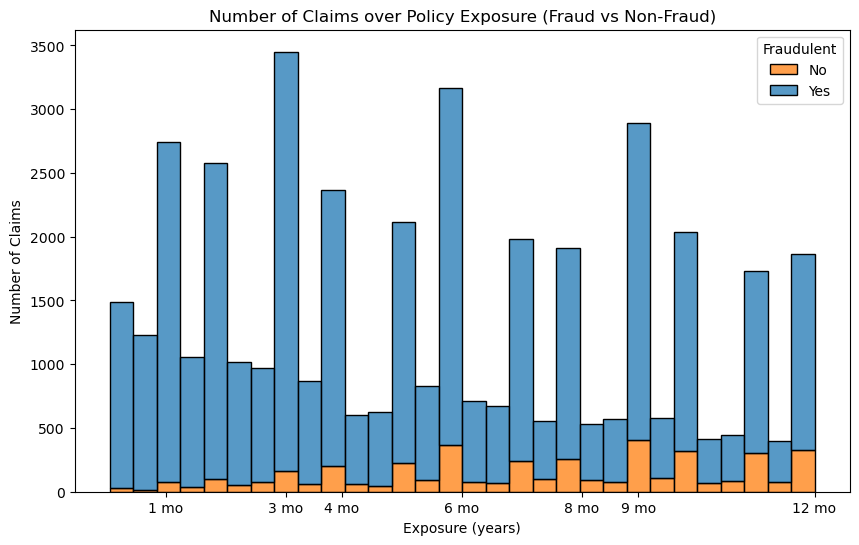

In [184]:
# Fraudulent and Non-Fraudulent Claims over Policy Exposure
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Exposure', bins=30, hue='ClaimInd', multiple='stack')
plt.title('Number of Claims over Policy Exposure (Fraud vs Non-Fraud)')
plt.xlabel('Exposure (years)')
plt.ylabel('Number of Claims')
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.xticks(
    [0.08, 0.25, 0.33, 0.50, 0.67, 0.75, 1.00],
    ['1 mo', '3 mo', '4 mo', '6 mo', '8 mo', '9 mo', '12 mo']
)
plt.show()

Reference:
0.08 → 1 month
0.25 → 3 months
0.33 → 4 months
0.50 → 6 months
0.67 → 8 months
0.75 → 9 months
1.00 → 12 months

C:\Users\Source\AppData\Local\Temp\ipykernel_6252\1294661080.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('ExposureBin')['ClaimInd'].mean().reset_index()


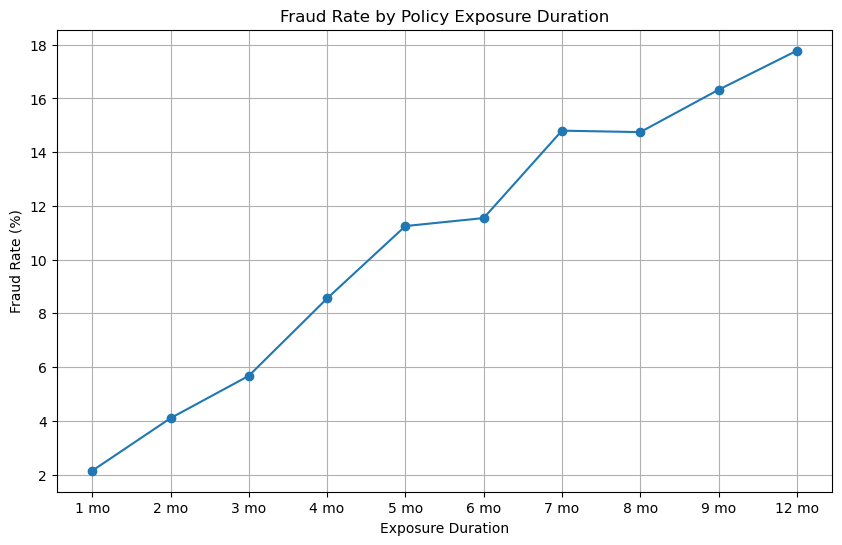

In [185]:
# xposure into month bins (1–12)
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['1 mo', '2 mo', '3 mo', '4 mo', '5 mo', '6 mo', '7 mo', '8 mo', '9 mo', '12 mo']
df['ExposureBin'] = pd.cut(df['Exposure'], bins=bins, labels=labels, right=True, include_lowest=True)

# Fraud rate per bin
fraud_rate = df.groupby('ExposureBin')['ClaimInd'].mean().reset_index()
fraud_rate['FraudRate'] = fraud_rate['ClaimInd'] * 100  # percent

# Fraud Rate Line chart visualization
plt.figure(figsize=(10,6))
plt.plot(fraud_rate['ExposureBin'], fraud_rate['FraudRate'], marker='o')
plt.title('Fraud Rate by Policy Exposure Duration')
plt.xlabel('Exposure Duration')
plt.ylabel('Fraud Rate (%)')
plt.grid(True)
plt.show()

In this dataset, short-duration policies show very few fraudulent claims, while the fraud rate grows steadily with time on risk. By one year, nearly 18% of policies have fraudulent claims versus only 2% after one month. This suggests that fraud detection strategies should not only focus on early-life claims but also monitor long-tenure policies, which accumulate higher fraud incidence over time.

**But you must be careful: is this relationship causal (fraud risk grows the longer someone is insured), or is it simply mechanical (the longer a policy is active, the more chances to have a flagged claim)?
***Let us calculate incidence rates per unit exposure instead of raw exposure as predictor as used by Actuaries

C:\Users\Source\AppData\Local\Temp\ipykernel_6252\1703729064.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = df.groupby('ExposureBin')['ClaimInd'].sum()
C:\Users\Source\AppData\Local\Temp\ipykernel_6252\1703729064.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_exposure = df.groupby('ExposureBin')['Exposure'].sum()


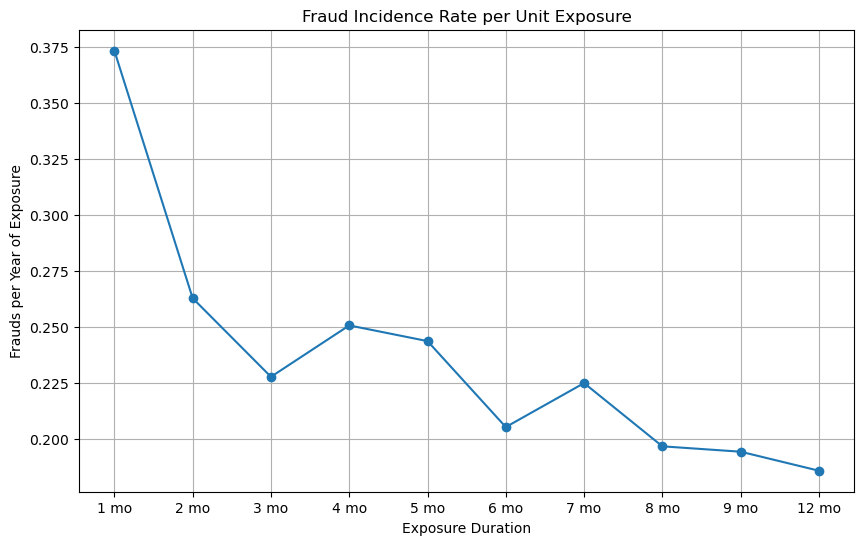

In [186]:
# Number of frauds and total exposure per bin
fraud_counts = df.groupby('ExposureBin')['ClaimInd'].sum()
total_exposure = df.groupby('ExposureBin')['Exposure'].sum()

# Incidence rate per unit exposure (frauds per year)
incidence_rate = (fraud_counts / total_exposure).reset_index()
incidence_rate.columns = ['ExposureBin', 'IncidenceRate']

# Plot Incidence rate per unit exposure
plt.figure(figsize=(10,6))
plt.plot(incidence_rate['ExposureBin'], incidence_rate['IncidenceRate'], marker='o')
plt.title('Fraud Incidence Rate per Unit Exposure')
plt.xlabel('Exposure Duration')
plt.ylabel('Frauds per Year of Exposure')
plt.grid(True)
plt.show()

Looking only at fraud rate per policy suggested longer policies were riskier. But this was misleading: longer contracts simply have more time to generate claims.

To get the true picture, we normalized by exposure (time insured), a standard actuarial adjustment. The results show fraud is most intense in short-lived policies: one-month contracts show nearly double the incidence per year compared to full-year policies.

Takeaway: Opportunistic fraud is concentrated early, so insurers should tighten checks at policy inception and monitor first-month claims closely.

<Figure size 600x400 with 0 Axes>

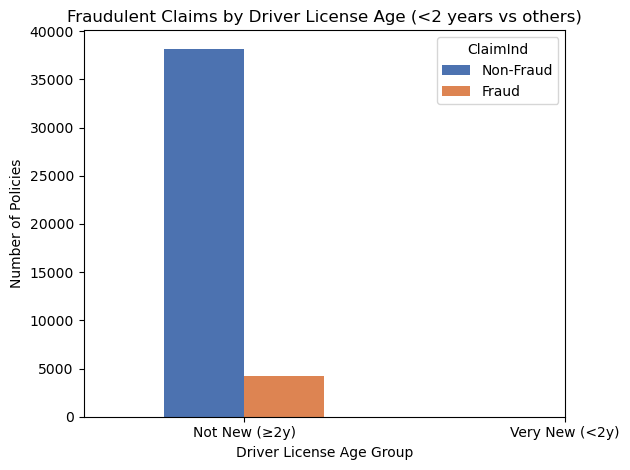

In [187]:
# Flag very new drivers (<2 years licensed, i.e., LicAge < 24 months)
df['VeryNewDriver'] = df['LicAge'] < 24

# Count of frauds by new vs. not new drivers
fraud_by_new = df.groupby('VeryNewDriver')['ClaimInd'].value_counts().unstack(fill_value=0)

# Bar plot: Fraudulent vs Non-Fraudulent for new and not new drivers
plt.figure(figsize=(6,4))
fraud_by_new.plot(kind='bar', stacked=False, color=['#4c72b0', '#dd8452'])
plt.xticks([0, 1], ['Not New (≥2y)', 'Very New (<2y)'], rotation=0)
plt.xlabel('Driver License Age Group')
plt.ylabel('Number of Policies')
plt.title('Fraudulent Claims by Driver License Age (<2 years vs others)')
plt.legend(['Non-Fraud', 'Fraud'], title='ClaimInd')
plt.tight_layout()
plt.show()

In [188]:
# License Age and Driver Age mismatch count (information mismatch: fraudulant behavior check flag)

# Convert license age to years
df["LicAge_yrs"] = df["LicAge"] / 12

# Age when license was obtained
df["age_at_license"] = df["DrivAge"] - df["LicAge_yrs"]

# Flag inconsistencies (license before 16 or nonsense values)
df["LicAge_inconsistent"] = (df["age_at_license"] < 16) | (df["age_at_license"] > df["DrivAge"]) | (df['LicAge'] < 0)

# Count and fraud rates
print("Number inconsistent:", df["LicAge_inconsistent"].sum())
print(df.groupby("LicAge_inconsistent")["ClaimInd"].mean())

#Since License inconsistancy flag variable has not significance, we drop it:
df = df.drop(columns=["LicAge_inconsistent"])


Number inconsistent: 10
LicAge_inconsistent
False    0.09941
True     0.00000
Name: ClaimInd, dtype: float64


After aligning driver age and license age with a realistic minimum licensing age of 16, we found only 10 inconsistent records (0.02%). This suggests LicAge is generally reliable in the dataset, and inconsistencies are probably due to data entry rather than fraud.

C:\Users\Source\AppData\Local\Temp\ipykernel_6252\3994430350.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_fraud = df.groupby('ExperienceBin')['ClaimInd'].mean().reset_index()


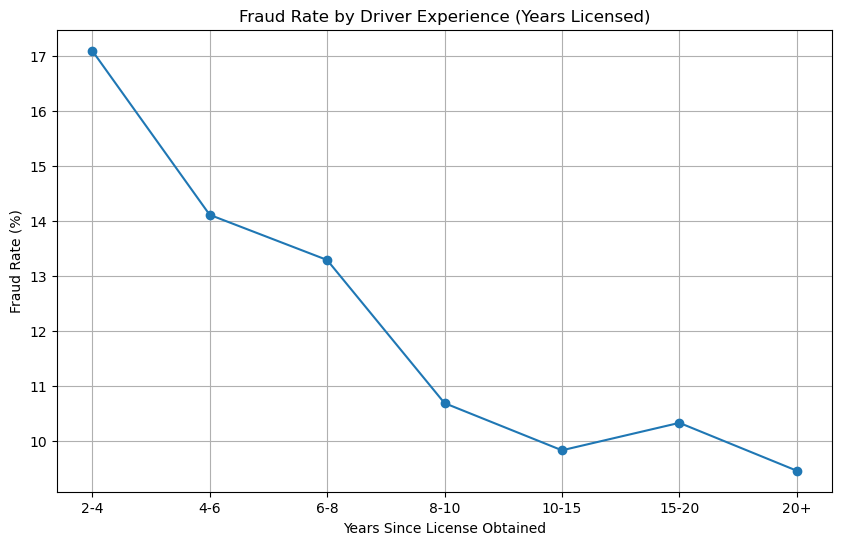

In [189]:
# Create a column for license age in years
df['LicAgeYears'] = df['LicAge'] / 12

# Bin license age into experience groups
bins = [0, 2, 4, 6, 8, 10, 15, 20, 100]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-15', '15-20', '20+']
df['ExperienceBin'] = pd.cut(df['LicAgeYears'], bins=bins, labels=labels, right=False)

# Calculate fraud rate per experience bin
exp_fraud = df.groupby('ExperienceBin')['ClaimInd'].mean().reset_index()
exp_fraud['FraudRate'] = exp_fraud['ClaimInd'] * 100

# Plot the experience curve
plt.figure(figsize=(10,6))
plt.plot(exp_fraud['ExperienceBin'], exp_fraud['FraudRate'], marker='o')
plt.title('Fraud Rate by Driver Experience (Years Licensed)')
plt.xlabel('Years Since License Obtained')
plt.ylabel('Fraud Rate (%)')
plt.grid(True)
plt.show()

Fraud risk declines with driving experience. Drivers licensed for fewer than 5 years show fraud rates above 14–17%, compared to under 10% for those with 15+ years’ experience. Although only a small number of drivers had licenses for less than 2 years, they still contributed fraudulent claims. We also found over 22,000 mismatches between driver age and license age likely due to data recording issues. Overall, license age is a strong predictor of fraud risk.

([<matplotlib.patches.Wedge at 0x1e482e7c1d0>,
 [Text(-0.9924457736848359, -0.4743958118439788, 'Male'),
  Text(0.9924457292686901, 0.4743959047634559, 'Female')],
 [Text(-0.5413340583735468, -0.2587613519148975, '64.2%'),
  Text(0.5413340341465582, 0.25876140259824865, '35.8%')])

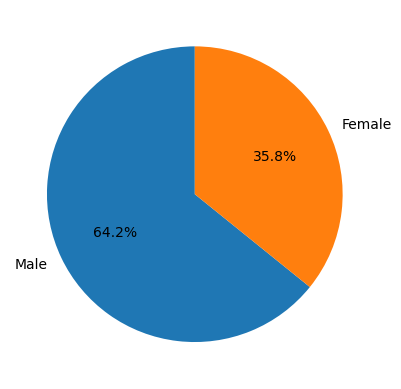

In [190]:
# Gender Distribution
gender_count=df['Gender'].value_counts()

plt.pie(gender_count, labels=gender_count.index, autopct="%.1f%%", startangle=90)

In [191]:
# Fraud rate by Gender and DrivAgefactor
tbl_age = (df.pivot_table(index="DrivAgefactor", columns="Gender",
                          values="ClaimInd", aggfunc="mean")*100).round(1)
print("Fraud rate by Driver Age band and Gender")
print(tbl_age)

Fraud rate by Driver Age band and Gender
Gender         Female  Male
DrivAgefactor              
18-25            15.0  14.5
25-40            10.0  10.8
40-60             9.5  10.3
50-70             9.9   9.2
70+               7.5   8.0


In [192]:
# BonusMalus Bins
bm_bins = pd.cut(df["BonusMalus"],
                 bins=[0,70,100,130,200,400],
                 labels=["≤70","70–100","100–130","130–200",">200"],
                 include_lowest=True)
df["BM_Band"] = bm_bins

# Fraud rate by Gender and BonusMalus band
tbl_bm = (df.pivot_table(index="BM_Band", columns="Gender",
                         values="ClaimInd", aggfunc="mean")*100).round(1)
print("\nFraud rate by Bonus-Malus band and Gender")
print(tbl_bm)

C:\Users\Source\AppData\Local\Temp\ipykernel_6252\2110989720.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tbl_bm = (df.pivot_table(index="BM_Band", columns="Gender",



Fraud rate by Bonus-Malus band and Gender
Gender   Female  Male
BM_Band              
≤70         9.0   9.6
70–100     12.2  11.7
100–130    11.7  14.4
130–200    13.7  18.3


In [193]:
# Fraud rate by Gender and VehUsage
tbl_usage = (df.pivot_table(index="VehUsage", columns="Gender",
                            values="ClaimInd", aggfunc="mean")*100).round(1)
print("Fraud rate by Vehicle Usage and Gender")
print(tbl_usage)

Fraud rate by Vehicle Usage and Gender
Gender                  Female  Male
VehUsage                            
Private                    9.2   8.2
Private+trip to office     9.7   9.8
Professional              11.7  13.4
Professional run           8.7  14.6


Around 64% of drivers are male and 36% are female. The overall fraud rates look very close for both groups. When we break it down further by age bands, Bonus-Malus levels, or vehicle usage, the differences are small and mostly vanish. A few gaps appear (like for professional use or very high Bonus-Malus), but these are better explained by driving behavior and policy type, not gender.

Key point: Gender is not a meaningful predictor of fraud on its own, and using it would risk bias and discrimination. Fraud detection should instead focus on objective factors such as driver age, experience, vehicle usage, and Bonus-Malus history.

In [194]:
# Socio-economic Category and age Fraud Indicator
tbl = df.pivot_table(
    index="SocioCateg",
    columns="DrivAgefactor",
    values="ClaimInd",
    aggfunc="sum",
    fill_value=0,
    margins=True,         
    margins_name="Total"
).astype(int)

tbl

DrivAgefactor,18-25,25-40,40-60,50-70,70+,Total
SocioCateg,,,,,,
CSP1,0,17,95,10,1,123
CSP16,0,0,0,0,0,0
CSP2,0,1,9,3,0,13
CSP20,0,0,0,1,0,1
CSP21,1,7,18,5,5,36
CSP22,0,8,9,3,1,21
CSP26,37,18,0,2,0,57
CSP3,0,2,5,0,0,7
CSP37,1,0,24,5,1,31


Most of the fraud cases are concentrated in just a few socio-professional categories. For example, CSP50 alone accounts for about half of all frauds in the dataset, while groups like CSP55 and CSP60 also show large numbers. The socio-professional codes are based on the French INSEE classification: CSP1 covers higher executives and liberal professions (engineers, doctors, lawyers), CSP2 refers to intermediate managers and supervisors, CSP3 are employees, and CSP6 are farmers. CSP7 includes artisans, shopkeepers, and small business owners. Some codes in this dataset such as CSP26, CSP50, CSP55, and CSP60 are anonymized groupings created for teaching purposes and don’t map directly to the official INSEE classification. Many other groups have no fraud at all in this sample.

Overall, fraud is more common in certain socio-economic categories and among drivers aged 25 to 60. But it’s important to be cautious: using socio-economic categories directly in a fraud model could introduce bias against specific groups. In practice, these variables are more useful for descriptive analysis than as predictive features.

In [195]:
# Vehicle usage type distribution
df["VehUsage"].value_counts()

VehUsage
Private+trip to office    21831
Private                   13093
Professional               6405
Professional run           1071
Name: count, dtype: int64

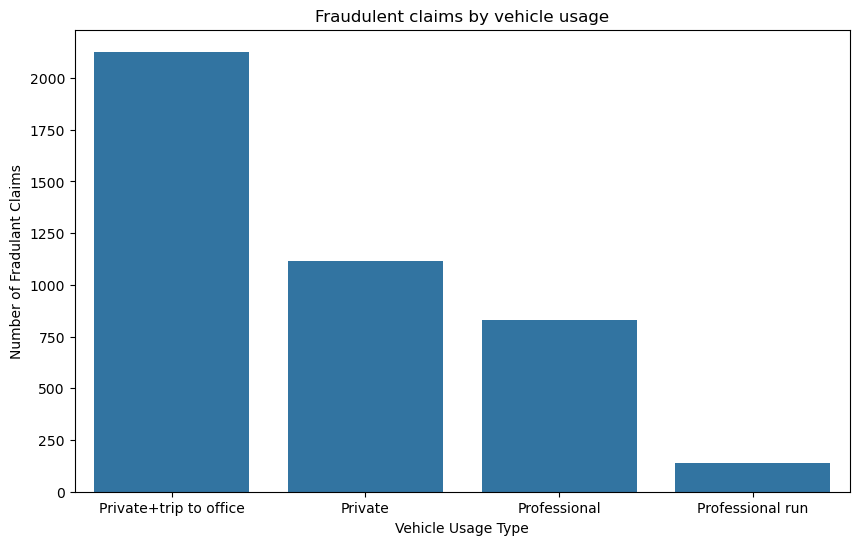

In [196]:
# Vehicle usage type Fraud distribution
vehicle_usage_type=df.groupby("VehUsage")["ClaimInd"].sum()

# Sorting from highest to lowest Fraud per Vehicle usage type
vehicle_usage_type=vehicle_usage_type.sort_values(ascending=False)

#Visualize through a Bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=vehicle_usage_type)
plt.title("Fraudulent claims by vehicle usage")
plt.xlabel("Vehicle Usage Type")
plt.ylabel("Number of Fradulant Claims")
plt.show()

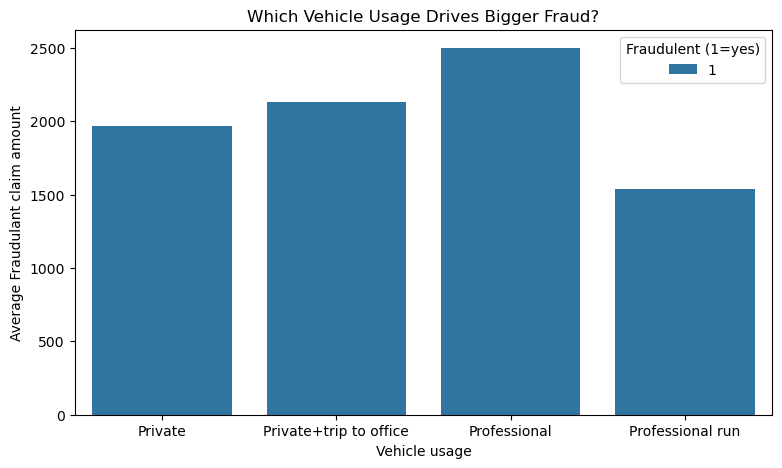

In [197]:
# Fraudulant Claim Severity per Vechile Usage Type

# Select only cases with claims amount (no non-claim cases)
df_claims_only=df[(df["ClaimAmount"]>0) & (df["ClaimInd"]==1)]

# Fraudulant Claim amount (for claimed cases only) per vehicle usage type
vehicle_claim_severity = df_claims_only.groupby(["VehUsage","ClaimInd"])["ClaimAmount"].mean().reset_index()

# Visualise using bar plot
plt.figure(figsize=(9,5))
sns.barplot(data=vehicle_claim_severity, x="VehUsage", y="ClaimAmount", hue="ClaimInd")
plt.title("Which Vehicle Usage Drives Bigger Fraud?")
plt.ylabel("Average Fraudulant claim amount")
plt.xlabel("Vehicle usage")
plt.legend(title="Fraudulent (1=yes)")
plt.show()

Most policies are for Private + trip to office (about 22k) and Private use (13k), while Professional (6k) and Professional run (1k) are much smaller groups. Fraudulent claims are also most frequent in the larger Private categories simply because they make up most of the portfolio. However, when we look at average claim amounts, frauds in Professional use stand out as the costliest, followed by Private+Office, while Professional run is lower

In [198]:
# Checking distribution of Km limit cases:
haskm_dist= df["HasKmLimit"].mean() * 100

print(f"Only {df['HasKmLimit'].sum()} cases have a pre-set Km Limit on their policy "
      f"(less than{haskm_dist: .2f}% of entire cases)")

Only 2870 cases have a pre-set Km Limit on their policy (less than 6.77% of entire cases)


C:\Users\Source\AppData\Local\Temp\ipykernel_6252\474960871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate_km, x="HasKmLimit", y="ClaimInd", palette="Set2")


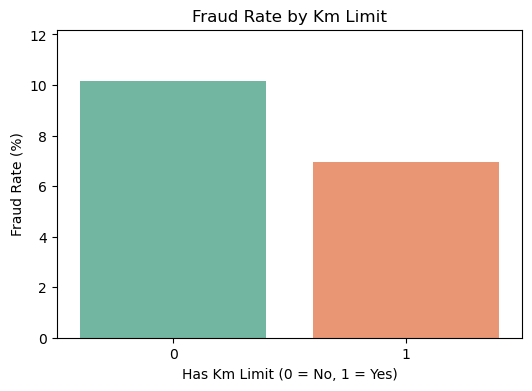

In [199]:
# Fraud rate per HasKmLimit group
fraud_rate_km = df.groupby("HasKmLimit")["ClaimInd"].mean().reset_index()
fraud_rate_km["ClaimInd"] = fraud_rate_km["ClaimInd"] * 100  # convert to %

plt.figure(figsize=(6,4))
sns.barplot(data=fraud_rate_km, x="HasKmLimit", y="ClaimInd", palette="Set2")
plt.title("Fraud Rate by Km Limit")
plt.xlabel("Has Km Limit (0 = No, 1 = Yes)")
plt.ylabel("Fraud Rate (%)")
plt.ylim(0, fraud_rate_km["ClaimInd"].max() * 1.2)
plt.show()

Only about 6.8% of policies in the dataset have a mileage limit (2,870 cases). When we compare fraud rates, policies without a mileage limit show a higher fraud rate (10%) compared to those with a limit (7%).

Takeaway: mileage-limit policies are relatively rare and seem slightly less fraud-prone

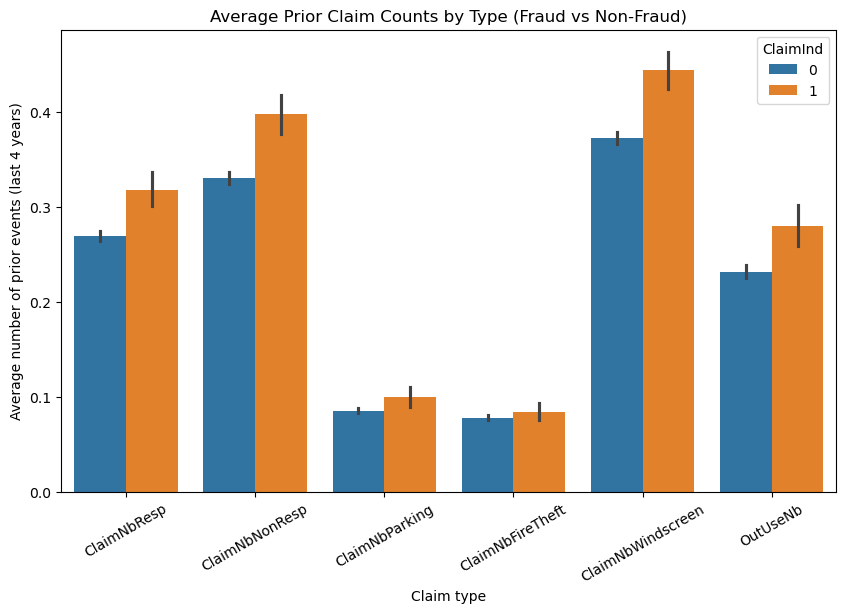

In [200]:
# Average Prior Claim Counts by Type (Fraud vs Non-Fraud)

claim_cols = [
    "ClaimNbResp",
    "ClaimNbNonResp",
    "ClaimNbParking",
    "ClaimNbFireTheft",
    "ClaimNbWindscreen",
    "OutUseNb"
]

# Reshape into long format for easy plotting
df_melted = df.melt(id_vars=["ClaimInd"], value_vars=claim_cols,
                    var_name="ClaimType", value_name="ClaimCount")

# Grouped bar: average counts per claim type, split by fraud vs non-fraud
plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x="ClaimType", y="ClaimCount", hue="ClaimInd")
plt.title("Average Prior Claim Counts by Type (Fraud vs Non-Fraud)")
plt.ylabel("Average number of prior events (last 4 years)")
plt.xlabel("Claim type")
plt.xticks(rotation=30)
plt.show()

People flagged as fraudulent often had more prior claims of every type in the past 4 years, especially “not my fault” claims (ClaimNbNonResp), windscreen incidents and reporting their car as out-of-use. That suggests fraudsters may use smaller or staged claims as a pattern before or along with bigger fraud. Also Parking and fire-theft claims show the least difference between fraud and non-fraud

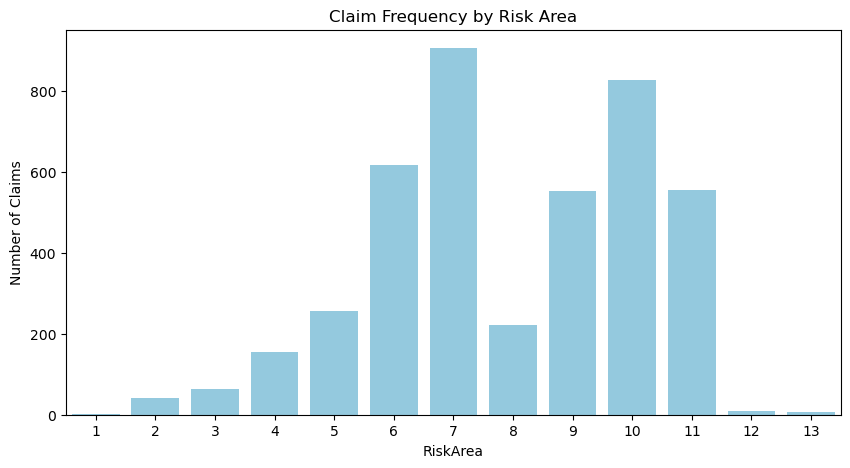

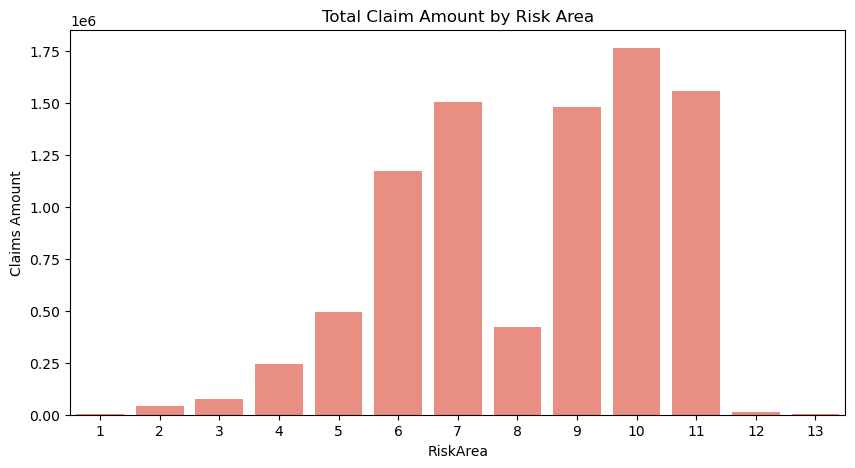

In [201]:
# Risk Area Claim frequency and claim exposure in amount

# Aggregate by RiskArea
risk_stats = df.groupby("RiskArea").agg(
    Claims=("ClaimInd","sum"),
    ClaimAmount=("ClaimAmount","sum")
).reset_index()

# Plot Claim Frequency
plt.figure(figsize=(10,5))
sns.barplot(data=risk_stats, x="RiskArea", y="Claims", color="skyblue")
plt.title("Claim Frequency by Risk Area")
plt.ylabel("Number of Claims")
plt.show()

# Plot Claim Amount
plt.figure(figsize=(10,5))
sns.barplot(data=risk_stats, x="RiskArea", y="ClaimAmount", color="salmon")
plt.title("Total Claim Amount by Risk Area")
plt.ylabel("Claims Amount")
plt.show()

The number of claims varies significantly across risk areas, with the highest volumes observed in Areas 7, 10, and 6. When looking at total claim amounts, the same areas dominate, especially Area 10, which records the largest overall claim cost. This suggests that these regions are not only more claim-prone but also more expensive for the insurer.

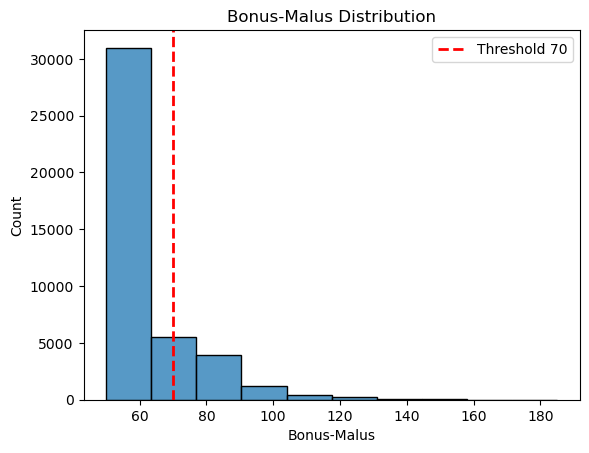

In [202]:
# Check Bonus-Malus Distribution (good vs Bad Drivers) {Good drivers generally below 70 Bonus-Malus}
sns.histplot(data=df['BonusMalus'], bins=10)
plt.axvline(x=70, color="red", linestyle="--", linewidth=2, label="Threshold 70")

plt.title("Bonus-Malus Distribution")
plt.xlabel("Bonus-Malus")
plt.ylabel("Count")
plt.legend()
plt.show()

What Bonus-Malus is

The Bonus-Malus coefficient (a.k.a. coefficient de réduction-majoration) adjusts premiums based on the driver’s claim history.

Starts at 100 when you first insure.

Bonus: goes down to 50 with no claims (max 50% discount).

Malus: goes up to 350 with repeated at-fault claims (max 250% surcharge).

So:

Lower = good history (safe drivers, fewer claims).

Higher = bad history (more claims, riskier)

C:\Users\Source\AppData\Local\Temp\ipykernel_6252\2411834476.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby("BM_Band")["ClaimInd"].mean().reset_index()


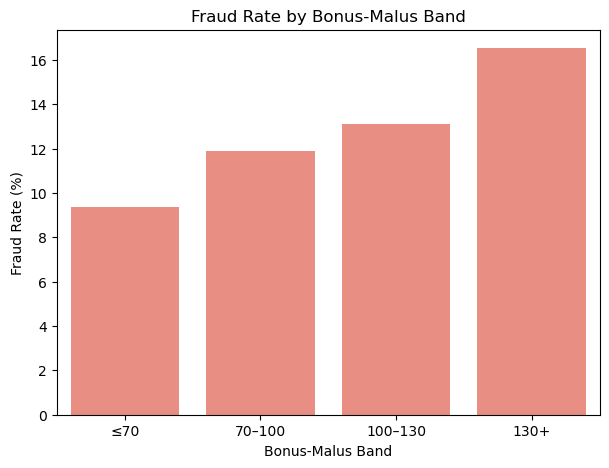

In [203]:
# Fraud rate by BonusMalus bands
# Define BonusMalus bands
bins = [0, 70, 100, 130, df["BonusMalus"].max()]
labels = ["≤70", "70–100", "100–130", "130+"]

df["BM_Band"] = pd.cut(df["BonusMalus"], bins=bins, labels=labels, right=True)

# Fraud rate by band
fraud_rate = df.groupby("BM_Band")["ClaimInd"].mean().reset_index()
fraud_rate["ClaimInd"] *= 100  # convert to %

plt.figure(figsize=(7,5))
sns.barplot(data=fraud_rate, x="BM_Band", y="ClaimInd", color="salmon")
plt.title("Fraud Rate by Bonus-Malus Band")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Bonus-Malus Band")
plt.show()

C:\Users\Source\AppData\Local\Temp\ipykernel_6252\3992620721.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_claims = df.groupby("BM_Band")["ClaimAmount"].mean().reset_index()


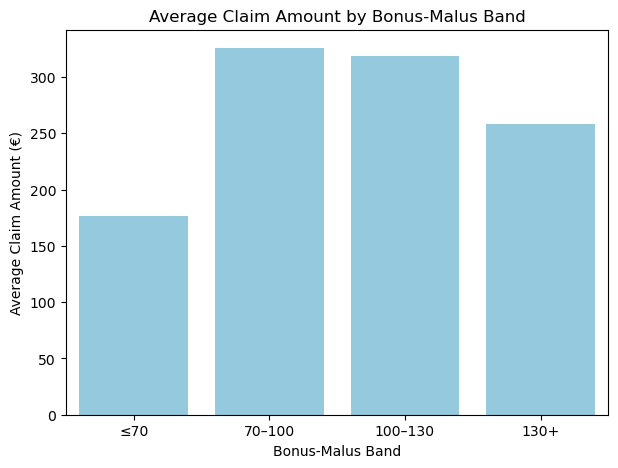

In [204]:
# Average claim amount by BonusMalus band
avg_claims = df.groupby("BM_Band")["ClaimAmount"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=avg_claims, x="BM_Band", y="ClaimAmount", color="skyblue")
plt.title("Average Claim Amount by Bonus-Malus Band")
plt.ylabel("Average Claim Amount (€)")
plt.xlabel("Bonus-Malus Band")
plt.show()

C:\Users\Source\AppData\Local\Temp\ipykernel_6252\2155434240.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_interaction = df.groupby(["BM_Band", "VehUsage"])["ClaimInd"].mean().reset_index()


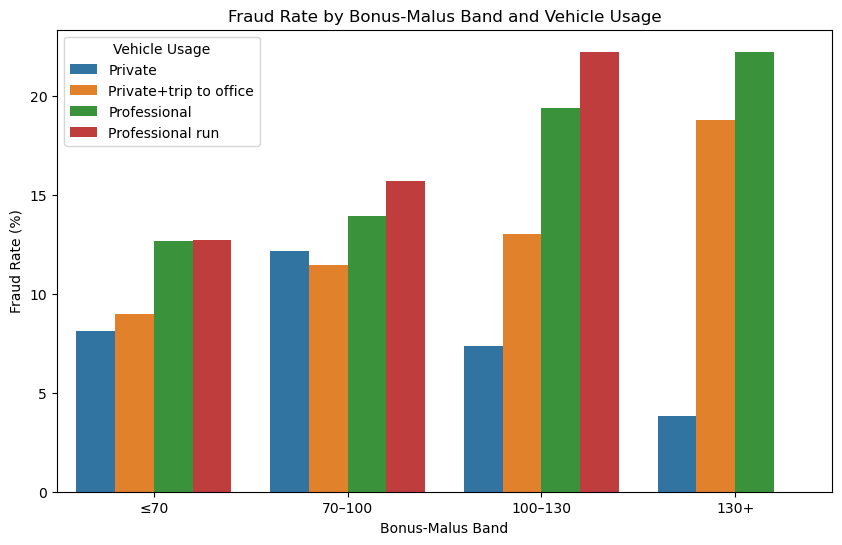

In [205]:
# Interaction: BonusMalus × VehUsage (fraud rate)
fraud_rate_interaction = df.groupby(["BM_Band", "VehUsage"])["ClaimInd"].mean().reset_index()
fraud_rate_interaction["ClaimInd"] *= 100

plt.figure(figsize=(10,6))
sns.barplot(data=fraud_rate_interaction, x="BM_Band", y="ClaimInd", hue="VehUsage")
plt.title("Fraud Rate by Bonus-Malus Band and Vehicle Usage")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Bonus-Malus Band")
plt.legend(title="Vehicle Usage")
plt.show()

The Bonus-Malus analysis reveals a clear relationship between claim history and fraud. The distribution shows that most policyholders are concentrated at the lower end of the scale (50–70), reflecting clean driving records with little or no penalty. Fraud rates, however, rise steadily with malus: from around 9% in the ≤70 band, to 12% at 70–100, 13% at 100–130, and peaking at over 16% in the 130+ group. This confirms that drivers with a worse claims record are significantly more likely to commit fraud. Looking at claim severity, the average claim amount is highest in the mid-bands (70–130), suggesting that these drivers may inflate claim sizes, whereas very high malus drivers appear to file more frequent but not necessarily the largest claims. When segmented by vehicle usage, differences sharpen: professional and professional run vehicles at 130+ malus show fraud rates above 20%, almost double those of private vehicles in the same band. This points to a combined effect of both prior claims history and usage type in driving fraud risk

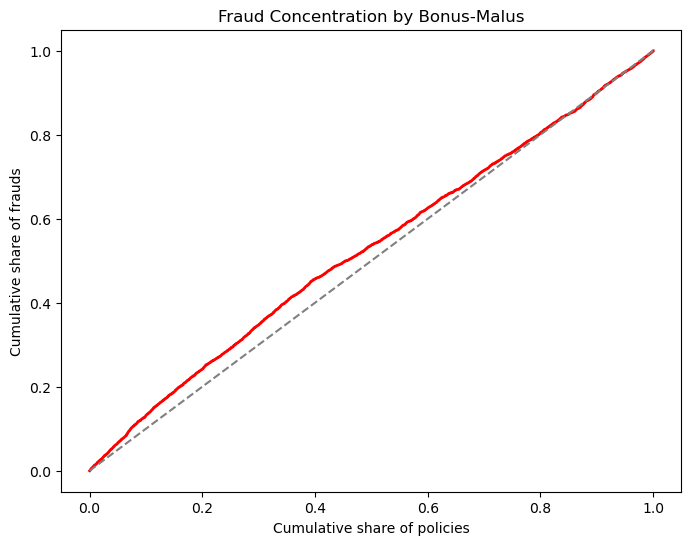

In [206]:
# Fraud Concentration by BonusMalus

# Sort by BonusMalus descending (high risk first)
df_sorted = df.sort_values("BonusMalus", ascending=False).reset_index(drop=True)

# Add cumulative fraud capture
df_sorted["cum_frauds"] = df_sorted["ClaimInd"].cumsum()
df_sorted["cum_policies"] = df_sorted.index + 1
df_sorted["cum_fraud_share"] = df_sorted["cum_frauds"] / df_sorted["ClaimInd"].sum()
df_sorted["cum_policy_share"] = df_sorted["cum_policies"] / len(df_sorted)

# Plot cumulative fraud capture curve
plt.figure(figsize=(8,6))
plt.plot(df_sorted["cum_policy_share"], df_sorted["cum_fraud_share"], color="red", lw=2)
plt.plot([0,1],[0,1], linestyle="--", color="gray")  # random baseline
plt.title("Fraud Concentration by Bonus-Malus")
plt.xlabel("Cumulative share of policies")
plt.ylabel("Cumulative share of frauds")
plt.show()

Bonus-Malus adds some signal, but not enough to isolate fraud cases effectively on its own. It should be used in combination with other factors rather than as a single filter for fraud detection.

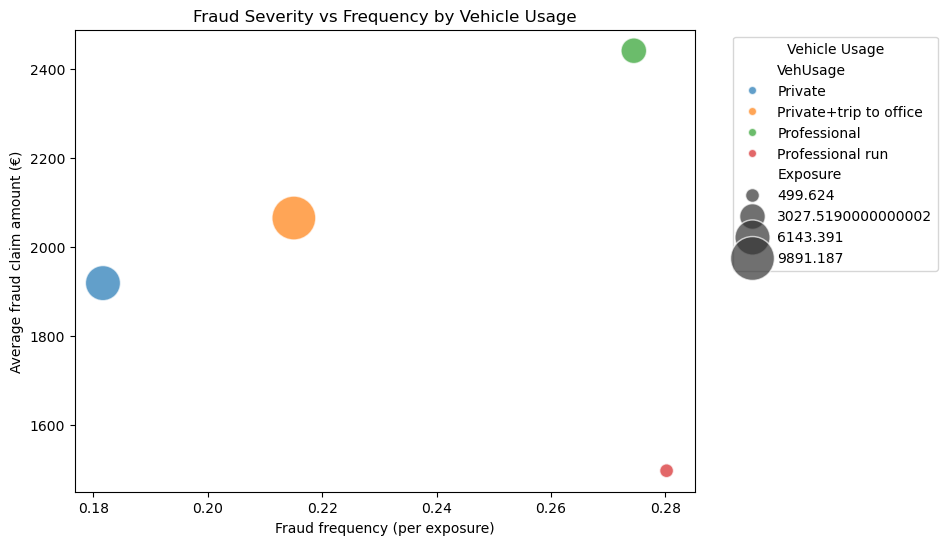

In [207]:
# Severity vs Frequency (bubble chart by VehUsage)

# Group-level fraud stats
group_stats = df.groupby("VehUsage").agg(
    Exposure=("Exposure","sum"),
    Claims=("ClaimInd","sum"),
    FraudAmount=("ClaimAmount","sum")
).reset_index()

group_stats["FraudFrequency"] = group_stats["Claims"] / group_stats["Exposure"]
group_stats["AvgFraudAmount"] = group_stats["FraudAmount"] / group_stats["Claims"]

# Bubble chart
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=group_stats,
    x="FraudFrequency", 
    y="AvgFraudAmount",
    size="Exposure",
    hue="VehUsage",
    sizes=(100,1000),
    alpha=0.7
)
plt.title("Fraud Severity vs Frequency by Vehicle Usage")
plt.xlabel("Fraud frequency (per exposure)")
plt.ylabel("Average fraud claim amount (€)")
plt.legend(title="Vehicle Usage", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

Fraud risk is not just about how often it happens but also how much it costs. Professional vehicles combine both high frequency and high severity, while private policies are relatively safer. From an insurer’s perspective, this highlights the need for stricter fraud monitoring in professional usage groups, especially given their outsized risk impact

---

## Executive Summary  

### Introduction  
Insurance fraud remains one of the most persistent challenges in the industry, eroding profitability and distorting portfolio risk.  
Industry studies estimate that fraud can account for **10–15% of claims costs**.  

In our dataset of **42,400 French motor insurance policies**, nearly **10% of all claims were fraudulent**.  
The purpose of this analysis is to understand where fraud concentrates, how it manifests, and which policyholder or policy features are most indicative of elevated fraud risk.  

---

## Key Findings  

### 1. Fraud in the Prime Driving Population  
- Almost all fraudulent claims come from drivers aged **20–60**.  
- Fraud rate peaks at **12% among 20–30 year olds**, while the **50–60 group** contributes the largest share of total fraud.  
- Fraud incidence falls sharply after age 70.  

### 2. Policy Duration Effect  
- Fraud rate appears to rise with policy age, reaching **18% at 12 months**.  
- But when normalized for exposure (time insured), the reverse is true:  
  **fraud intensity is highest in short-lived policies, especially in the first month**.  
- This indicates **opportunistic fraud at policy inception**.  

### 3. Driving Experience  
- Drivers with < **5 years of license history** show fraud rates of **14–17%**.  
- More experienced drivers (15+ years licensed) show < **10% fraud**.  
- Very new drivers (< 2 years licensed) are small in number but disproportionately risky.  

### 4. Socio-Economic & Demographic Variables  
- Fraud is higher in certain socio-professional categories, especially **CSP50**, which accounts for **~50% of frauds**.  
- However, **socio-economic groupings and gender should not be used as predictive features** due to bias risks.  

### 5. Vehicle Usage  
- Fraud frequency and severity are highest for **professional-use vehicles**.  
- Average fraudulent claim severity exceeds **€2,400** in this segment.  
- Private vehicles remain safer, but due to volume, still drive a significant share of total fraud.  

### 6. Policy Design (Mileage Limits)  
- Only **7% of policies** had mileage limits.  
- These showed **lower fraud rates (7% vs 10%)**, suggesting mileage restrictions discourage opportunistic fraud.  

### 7. Prior Claims History  
- Fraudulent policyholders typically have more prior incidents, especially:  
  - “Not-my-fault” accidents  
  - Windscreen claims  
  - Out-of-use declarations  
- This suggests a behavioral pattern: minor or staged claims often precede larger fraudulent ones.  

### 8. Geography & Bonus-Malus  
- Fraud is concentrated in **Risk Areas 7, 10, and 6** — with **Area 10 having the largest total claim cost**.  
- Fraud risk rises with Bonus-Malus:  
  - **≤70 → 9% fraud**  
  - **70–100 → 12% fraud**  
  - **100–130 → 13% fraud**  
  - **130+ → 16%+ fraud**  
- Professional-use vehicles with **high Bonus-Malus** exceed **20% fraud rate**.  
- **But Bonus-Malus alone is not strong enough** to act as a fraud filter — it must be combined with other factors.  

---

## Conclusions & Recommendations  

Fraud clusters around:  
- Younger and mid-aged drivers  
- Inexperienced license holders  
- Professional vehicle usage  
- High Bonus-Malus histories  
- Policyholders with repeated minor claims  

**Recommendations for Insurers:**  
- **Strengthen early-life fraud detection** → extra checks during the **first 1–3 months** of coverage.  
- **Target high-risk groups** → young, inexperienced, professional-use vehicles with high Bonus-Malus.  
- **Leverage prior claims behavior** → flag repeated non-responsible or windscreen claims.  
- **Avoid biased features** → socio-economic codes and gender should remain descriptive, not predictive.  
- **Blend frequency & severity lenses** → focus on both how often fraud happens *and* which groups drive the highest costs.  

---

## Final Note  
This analysis confirms that fraud is both a **frequency problem** and a **severity problem**, amplified by specific behavioral and portfolio niches.  

Embedding these insights into **underwriting, claims handling, and fraud detection systems** will enable insurers to:  
- Target high-risk cases more effectively  
- Reduce financial leakage  
- Protect honest policyholders  

---

## About the Data  
The analysis is based on the **French Motor Third-Party Liability dataset (freMPL6)**, available in the *CASdatasets* package for actuarial science research.  
While anonymized and simplified for teaching purposes, the dataset reflects real-world structures and risk factors observed in the French motor insurance market.  

---

# Fraud Detection

- Data Cleaning and Pre-processing for Logistic Regression

In [208]:
# Importing necessary libraries
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score, recall_score, f1_score,
    confusion_matrix, precision_recall_curve
)
from scipy import sparse
import shap

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from xgboost import XGBClassifier

import optuna

In [209]:
# Deep Copy dataset
df_LR = df.copy(deep=True)
df_LR.head(3)


,Exposure,LicAge,RecordBeg,RecordEnd,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,ClaimAmount,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea,BonusMalus,ClaimInd,DrivAgefactor,AgeGroup,ExposureBin,VeryNewDriver,LicAge_yrs,age_at_license,LicAgeYears,ExperienceBin,BM_Band
0,0.333,468,2004-01-01,2004-05-01,Male,Other,CSP50,Private,67,0,0.0,1,0,0,0,0,0,9,50,0,50-70,"[60, 70)",4 mo,False,39.000000,28.000000,39.000000,20+,≤70
1,0.666,472,2004-05-01,NaN,Male,Other,CSP50,Private,68,0,0.0,1,0,0,0,0,0,9,50,0,50-70,"[60, 70)",7 mo,False,39.333333,28.666667,39.333333,20+,≤70
2,0.207,169,2004-01-01,2004-03-16,Male,Other,CSP50,Private+trip to office,32,0,0.0,0,2,0,0,0,0,7,72,0,25-40,"[30, 40)",3 mo,False,14.083333,17.916667,14.083333,10-15,70–100


In [ ]:
# Add ClaimId for interpretation later on, with prefix 'C' and follwing random numbers
df_LR["ClaimId"] = [f"C{i:06d}" for i in range(1, len(df_LR)+1)]

# Index ClaimId
df_LR = df_LR.set_index("ClaimId", drop=False)

In [ ]:
# Binning Exposure (<3, 3-9 and >=9) 
# For fraud classification, we DROP exposure (and bins) to avoid mechanical leakage.
if "Exposure_binned" in df_LR.columns: 
    df_LR = df_LR.drop(columns=["Exposure_binned"])
if "Exposure" in df_LR.columns:
    df_LR = df_LR.drop(columns=["Exposure"])

# Convert Driver and License ages to years for consistency
df_LR["DrivAge"] = (df_LR["DrivAge"]).round(0).astype(int)
df_LR["LicAgeYears"] = (df_LR["LicAgeYears"]).round(0).astype(int)

# Create flag for impossible license real-life scenarios (driver age < 16 or Licence age > Driver age)
age_at_license = df_LR["DrivAge"] - df_LR["LicAgeYears"]
df_LR["LicAge_inconsistent"] = ((age_at_license < 16) | (df_LR["LicAgeYears"] > df_LR["DrivAge"])).astype(int)
del age_at_license

# Bin prior claim variables (0, 1, >=2) – only using past 4-year history (legit predictors)
prior_claims = [
    "ClaimNbResp", "ClaimNbNonResp", "ClaimNbParking", 
    "ClaimNbFireTheft", "ClaimNbWindscreen", "OutUseNb"
]

for col in prior_claims:
    if col in df_LR.columns:
        df_LR[col + "_bucket"] = pd.cut(
            df_LR[col],
            bins=[-1,0,1,100],
            labels=["0","1","2+"]
        ).astype(str)

# Drop original prior claim counts
df_LR = df_LR.drop(columns=[c for c in prior_claims if c in df_LR.columns])

# Drop unused/ unnecessary or bias-prone columns (Gender and Socio Category)
drop_cols = [
    "Gender", "SocioCateg", "RecordBeg", "RecordEnd", "LicAge", "ExposureBin", "VeryNewDriver",
    "DrivAgefactor", "AgeGroup", "ExperienceBin", "age_at_license", "LicAge_yrs"
]
df_LR = df_LR.drop(columns=[c for c in drop_cols if c in df_LR.columns])

for col_to_drop in ["ClaimAmount", "ClaimAmount_log"]:
    if col_to_drop in df_LR.columns:
        df_LR = df_LR.drop(columns=col_to_drop)

# 8. Ensure RiskArea, VehUsage, MariStat, HasKmLimit and claim history buckets are categorical
cat_cols = [
    "RiskArea","VehUsage","MariStat","HasKmLimit",
    "BM_Band",
    "ClaimNbResp_bucket","ClaimNbNonResp_bucket","ClaimNbParking_bucket",
    "ClaimNbFireTheft_bucket","ClaimNbWindscreen_bucket","OutUseNb_bucket"
]

for col in cat_cols:
    if col in df_LR.columns:
        df_LR[col] = df_LR[col].astype("category")

# Final check
print("Columns in df_LR:", df_LR.columns.tolist())
df_LR.head()


Columns in df_LR: ['MariStat', 'VehUsage', 'DrivAge', 'HasKmLimit', 'RiskArea', 'BonusMalus', 'ClaimInd', 'LicAgeYears', 'BM_Band', 'ClaimId', 'LicAge_inconsistent', 'ClaimNbResp_bucket', 'ClaimNbNonResp_bucket', 'ClaimNbParking_bucket', 'ClaimNbFireTheft_bucket', 'ClaimNbWindscreen_bucket', 'OutUseNb_bucket']


,MariStat,VehUsage,DrivAge,HasKmLimit,RiskArea,BonusMalus,ClaimInd,LicAgeYears,BM_Band,ClaimId,LicAge_inconsistent,ClaimNbResp_bucket,ClaimNbNonResp_bucket,ClaimNbParking_bucket,ClaimNbFireTheft_bucket,ClaimNbWindscreen_bucket,OutUseNb_bucket
ClaimId,,,,,,,,,,,,,,,,,
C000001,Other,Private,67,0,9,50,0,39,≤70,C000001,0,1,0,0,0,0,0
C000002,Other,Private,68,0,9,50,0,39,≤70,C000002,0,1,0,0,0,0,0
C000003,Other,Private+trip to office,32,0,7,72,0,14,70–100,C000003,0,0,2+,0,0,0,0
C000004,Other,Private+trip to office,32,0,7,68,0,14,≤70,C000004,0,0,2+,0,0,0,0
C000005,Other,Private+trip to office,33,0,7,68,0,15,≤70,C000005,0,0,2+,0,0,0,0


In [148]:
# Set Target and features
X = df_LR.drop(columns=["ClaimInd", "ClaimId"])
y = df_LR["ClaimInd"]

# First split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# Second split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (29678, 15)
Validation size: (6362, 15)
Test size: (6360, 15)


In [149]:
# --- Train / Validation / Test split (stratified) ---
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42
)

print("Train size:", X_train.shape, "Fraud rate:", y_train.mean().round(3))
print("Val size:", X_val.shape, "Fraud rate:", y_val.mean().round(3))
print("Test size:", X_test.shape, "Fraud rate:", y_test.mean().round(3))

# --- Identify feature types ---
cat_cols = X.select_dtypes(include=["category", "object"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()

print("Categorical features:", cat_cols)
print("Numeric features:", num_cols)

# --- Preprocess: OneHotEncode categoricals + scale numerics ---
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
        ("num", StandardScaler(with_mean=False), num_cols),
    ]
)

# --- Logistic Regression (balanced class weights) ---
logreg = LogisticRegression(
    class_weight="balanced",
    max_iter=2000,
    solver="liblinear",
    n_jobs=-1
)

pipe_lr = Pipeline([
    ("preprocess", preprocess),
    ("clf", logreg)
])

# --- Train ---
pipe_lr.fit(X_train, y_train)

# --- Validation predictions ---
val_scores = pipe_lr.predict_proba(X_val)[:, 1]
val_pred = (val_scores >= 0.5).astype(int)

# --- Metrics ---
roc = roc_auc_score(y_val, val_scores)
pr_auc = average_precision_score(y_val, val_scores)
prec = precision_score(y_val, val_pred)
rec = recall_score(y_val, val_pred)
f1  = f1_score(y_val, val_pred)
cm  = confusion_matrix(y_val, val_pred)

print(f"ROC-AUC: {roc:.3f} | PR-AUC: {pr_auc:.3f}")
print(f"Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
print("Confusion matrix [[TN, FP],[FN, TP]]:\n", cm)

Train size: (29678, 15) Fraud rate: 0.099
Val size: (6362, 15) Fraud rate: 0.099
Test size: (6360, 15) Fraud rate: 0.099
Categorical features: ['MariStat', 'VehUsage', 'HasKmLimit', 'RiskArea', 'BM_Band', 'ClaimNbResp_bucket', 'ClaimNbNonResp_bucket', 'ClaimNbParking_bucket', 'ClaimNbFireTheft_bucket', 'ClaimNbWindscreen_bucket', 'OutUseNb_bucket']
Numeric features: ['BonusMalus']
ROC-AUC: 0.570 | PR-AUC: 0.121
Precision: 0.122 | Recall: 0.521 | F1: 0.197
Confusion matrix [[TN, FP],[FN, TP]]:
 [[3358 2372]
 [ 303  329]]


c:\Users\Source\.conda\envs\py\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


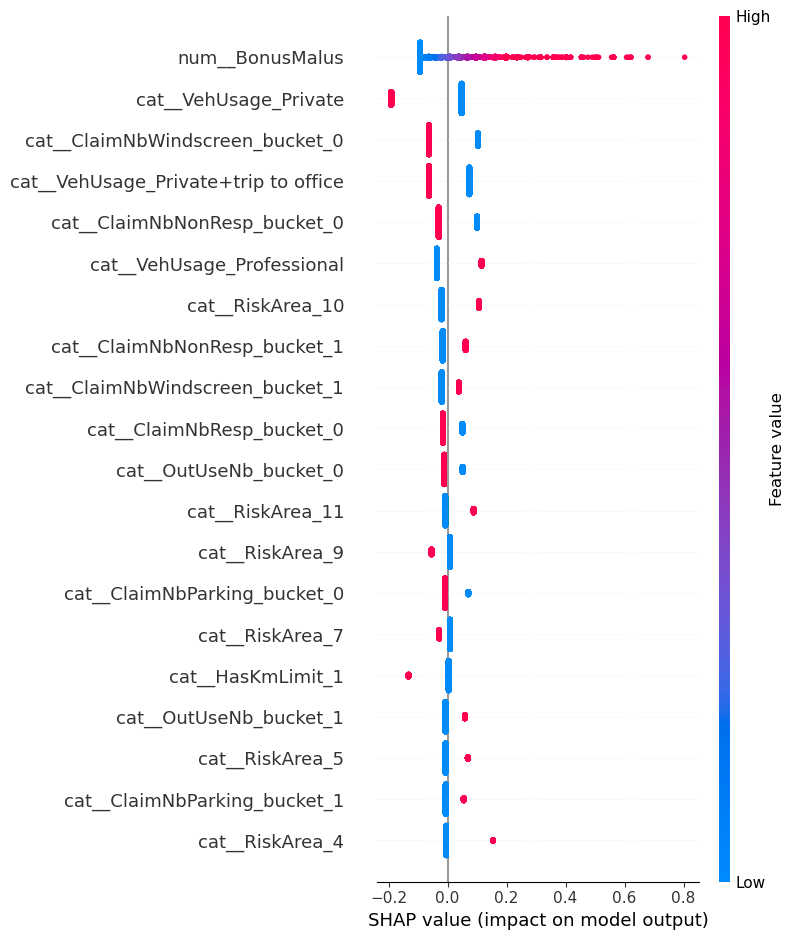

Fraudulent ClaimIds in validation: ['C033217', 'C004661', 'C015095', 'C027244', 'C041014', 'C002144', 'C000239', 'C020891', 'C014317', 'C001215'] ...

=== Local SHAP | ClaimId=C033217 | True Fraud ===


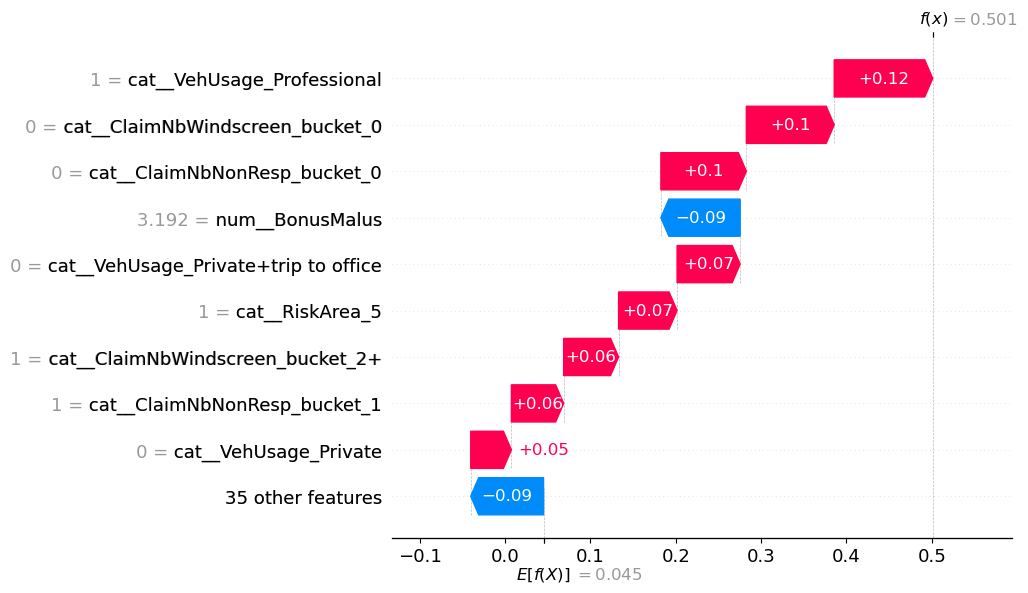


=== Local SHAP | ClaimId=C004661 | True Fraud ===


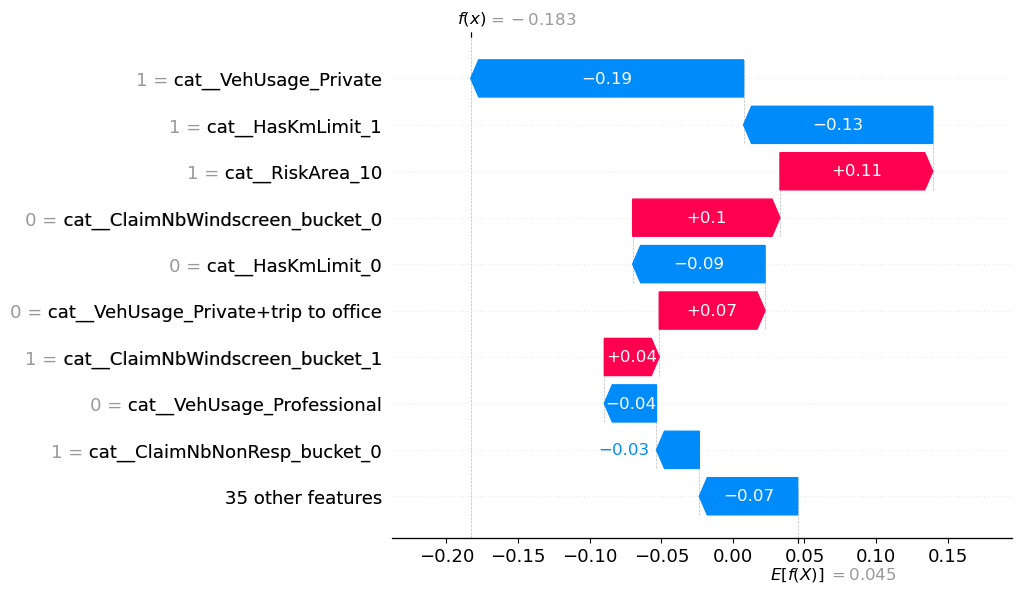


=== Local SHAP | ClaimId=C015095 | True Fraud ===


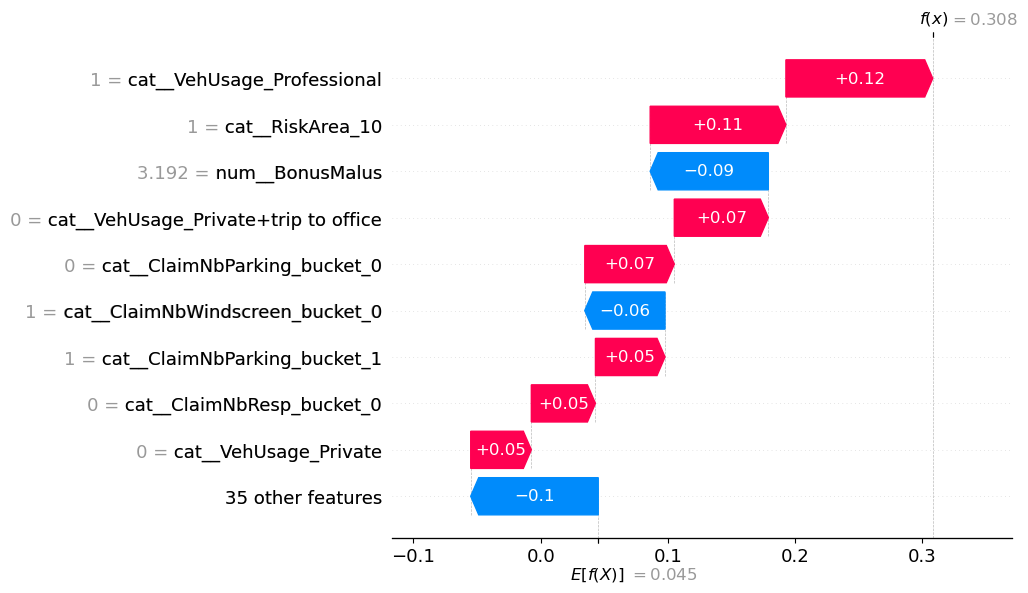


=== Local SHAP | ClaimId=C027244 | True Fraud ===


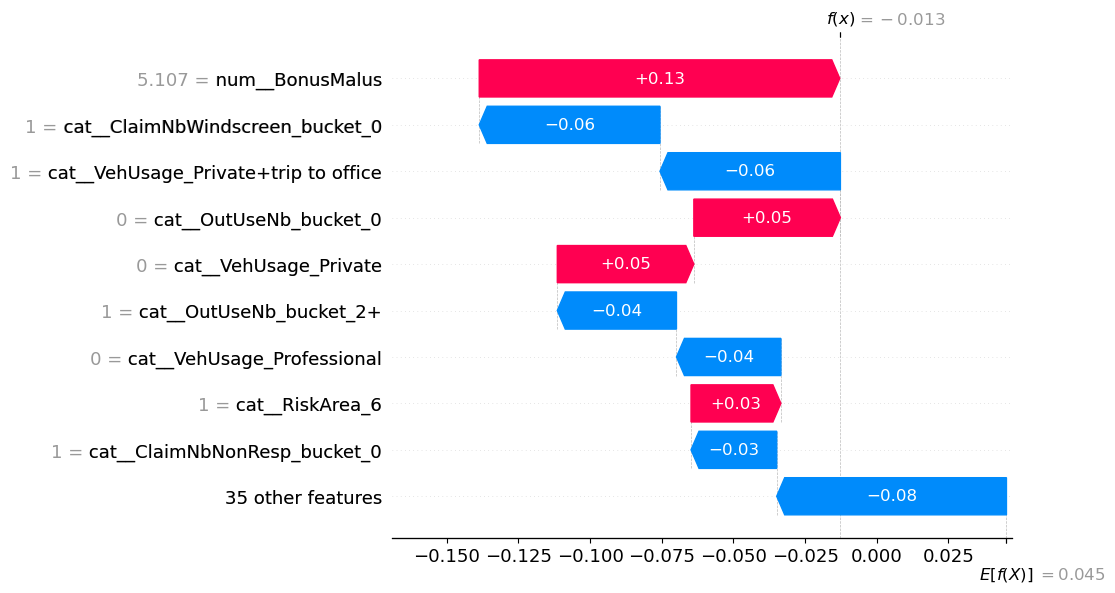


=== Local SHAP | ClaimId=C041014 | True Fraud ===


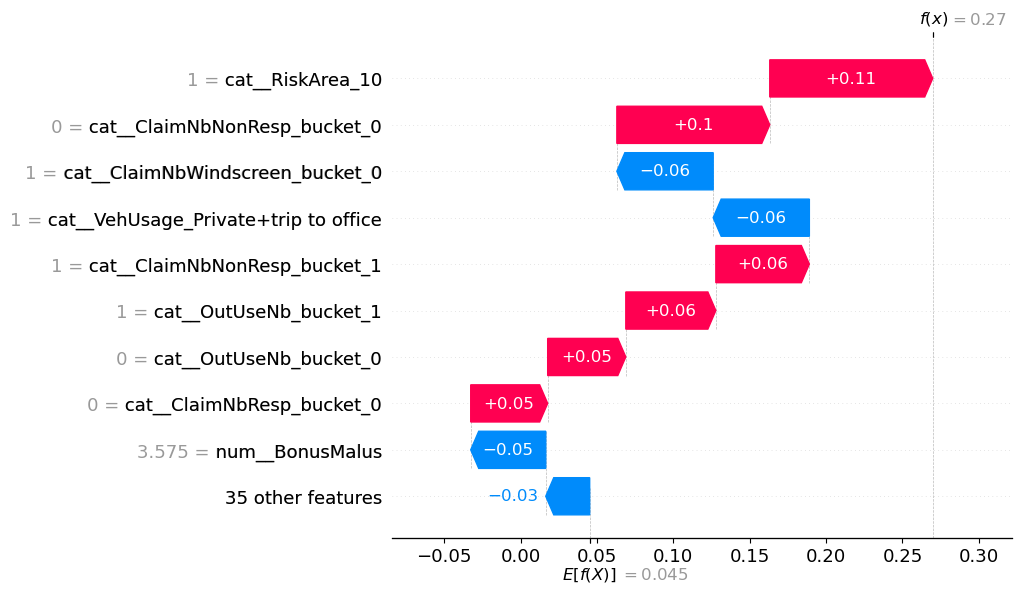

In [150]:
# =========================
# SHAP Interpretation (Logistic Regression)
# =========================
pre = pipe_lr.named_steps["preprocess"]
clf = pipe_lr.named_steps["clf"]

X_train_trans = pre.transform(X_train)
X_val_trans   = pre.transform(X_val)

try:
    feat_names = pre.get_feature_names_out()
except Exception:
    feat_names = np.array(cat_cols + num_cols)

# Background sample for speed
rng = np.random.default_rng(42)
bg_idx = rng.choice(X_train_trans.shape[0], size=min(1000, X_train_trans.shape[0]), replace=False)
X_bg = X_train_trans[bg_idx]

# ---- Global SHAP ----
explainer = shap.LinearExplainer(clf, X_bg)
shap_vals = explainer.shap_values(X_val_trans)
X_val_plot = X_val_trans.toarray() if sparse.issparse(X_val_trans) else X_val_trans

shap.summary_plot(
    shap_vals,
    features=X_val_plot,
    feature_names=feat_names,
    max_display=20,
    show=True
)

# ---- Local SHAP for actual frauds ----
fraud_idx = np.where(y_val.values == 1)[0]   # indices of true frauds
print("Fraudulent ClaimIds in validation:", X_val.iloc[fraud_idx].index.tolist()[:10], "...")

# Limit to first few frauds for readability
for i in fraud_idx[:5]:
    ex = shap.Explanation(
        values=shap_vals[i],
        base_values=explainer.expected_value,
        data=X_val_plot[i],
        feature_names=feat_names
    )
    print(f"\n=== Local SHAP | ClaimId={X_val.iloc[i].name} | True Fraud ===")
    shap.plots.waterfall(ex, max_display=10, show=True)


- Data Cleaning and Pre-processing for Tree Based Models: Random Forest & XGBoost

In [151]:
df_tree = df.copy(deep=True)

# Add ClaimId if not already
if "ClaimId" not in df_tree.columns:
    df_tree["ClaimId"] = [f"C{i:06d}" for i in range(1, len(df_tree)+1)]

# Target
target_col = "ClaimInd"

# --- 1. Drop outcome / leakage variables ---
drop_cols = ["ClaimAmount", "ClaimAmount_log", "RecordBeg", "RecordEnd", "DrivAgefactor",
             "AgeGroup", "ExperienceBin", "ExposureBin", "VeryNewDriver",
             "SocioCateg", "Gender"]  # bias-prone or descriptive only
df_tree = df_tree.drop(columns=[c for c in drop_cols if c in df_tree.columns])

# --- 2. Convert Driver age & license age ---
df_tree["DrivAge"] = df_tree["DrivAge"].round(0).astype(int)
df_tree["LicAgeYears"] = (df_tree["LicAge"] / 12).round(0).astype(int)

# Flag inconsistencies (optional feature)
age_at_license = df_tree["DrivAge"] - df_tree["LicAgeYears"]
df_tree["LicAge_inconsistent"] = ((age_at_license < 16) | (df_tree["LicAgeYears"] > df_tree["DrivAge"])).astype(int)
del age_at_license

# --- 3. Bin prior claim variables (0,1,2+) ---
prior_claims = ["ClaimNbResp","ClaimNbNonResp","ClaimNbParking",
                "ClaimNbFireTheft","ClaimNbWindscreen","OutUseNb"]

for col in prior_claims:
    if col in df_tree.columns:
        df_tree[col + "_bucket"] = pd.cut(
            df_tree[col], bins=[-1,0,1,100], labels=["0","1","2+"]
        ).astype(str)

df_tree = df_tree.drop(columns=[c for c in prior_claims if c in df_tree.columns])

# --- 4. Cast categoricals (tree-friendly) ---
cat_cols = ["RiskArea","VehUsage","MariStat","HasKmLimit","BM_Band",
            "ClaimNbResp_bucket","ClaimNbNonResp_bucket","ClaimNbParking_bucket",
            "ClaimNbFireTheft_bucket","ClaimNbWindscreen_bucket","OutUseNb_bucket"]

for col in cat_cols:
    if col in df_tree.columns:
        df_tree[col] = df_tree[col].astype("category")

# --- 5. Final dataset ---
X = df_tree.drop(columns=[target_col, "ClaimId"])
y = df_tree[target_col]

print("Final predictors:", X.columns.tolist())
print("Categorical predictors:", [c for c in cat_cols if c in X.columns])
print("Numeric predictors:", [c for c in X.columns if c not in cat_cols])


Final predictors: ['Exposure', 'LicAge', 'MariStat', 'VehUsage', 'DrivAge', 'HasKmLimit', 'RiskArea', 'BonusMalus', 'LicAge_yrs', 'age_at_license', 'LicAgeYears', 'BM_Band', 'LicAge_inconsistent', 'ClaimNbResp_bucket', 'ClaimNbNonResp_bucket', 'ClaimNbParking_bucket', 'ClaimNbFireTheft_bucket', 'ClaimNbWindscreen_bucket', 'OutUseNb_bucket']
Categorical predictors: ['RiskArea', 'VehUsage', 'MariStat', 'HasKmLimit', 'BM_Band', 'ClaimNbResp_bucket', 'ClaimNbNonResp_bucket', 'ClaimNbParking_bucket', 'ClaimNbFireTheft_bucket', 'ClaimNbWindscreen_bucket', 'OutUseNb_bucket']
Numeric predictors: ['Exposure', 'LicAge', 'DrivAge', 'BonusMalus', 'LicAge_yrs', 'age_at_license', 'LicAgeYears', 'LicAge_inconsistent']


- Random Forest with SMOTE

In [152]:
# --- Train / Validation / Test split ---
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42
)

print("Train size:", X_train.shape, "Fraud rate:", y_train.mean().round(3))
print("Val size:", X_val.shape, "Fraud rate:", y_val.mean().round(3))
print("Test size:", X_test.shape, "Fraud rate:", y_test.mean().round(3))

# --- Identify categorical vs numeric ---
cat_features = [c for c in X.columns if str(X[c].dtype) == "category"]
num_features = [c for c in X.columns if c not in cat_features]

# --- Pipeline: OrdinalEncode categoricals → SMOTE → RF ---
preprocess = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=3,
    n_jobs=-1,
    random_state=42
)

pipe_rf = ImbPipeline(steps=[
    ("encoder", preprocess),
    ("smote", SMOTE(random_state=42, sampling_strategy=0.5)),
    ("clf", rf)
])

# --- Train ---
pipe_rf.fit(X_train, y_train)

# --- Validation predictions ---
val_probs = pipe_rf.predict_proba(X_val)[:, 1]
val_pred = (val_probs >= 0.5).astype(int)

# --- Metrics ---
roc = roc_auc_score(y_val, val_probs)
pr_auc = average_precision_score(y_val, val_probs)
prec = precision_score(y_val, val_pred)
rec  = recall_score(y_val, val_pred)
f1   = f1_score(y_val, val_pred)
cm   = confusion_matrix(y_val, val_pred)

print(f"ROC-AUC: {roc:.3f} | PR-AUC: {pr_auc:.3f}")
print(f"Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
print("Confusion matrix [[TN, FP],[FN, TP]]:\n", cm)

# --- Precision@k and lift table ---
def precision_at_k(y_true, y_scores, k):
    n = len(y_true)
    top_k = int(np.ceil(k * n)) if 0 < k <= 1 else int(k)
    order = np.argsort(-y_scores)
    idx = order[:top_k]
    return y_true.iloc[idx].mean()

def lift_table(y_true, y_scores, n_bins=10):
    df_tmp = pd.DataFrame({"y": y_true.values, "score": y_scores}, index=y_true.index)
    df_tmp["decile"] = pd.qcut(df_tmp["score"].rank(method="first"), n_bins, labels=False) + 1
    df_tmp["decile"] = n_bins + 1 - df_tmp["decile"]
    agg = df_tmp.groupby("decile").agg(
        n=("y","size"), events=("y","sum"), avg_score=("score","mean")
    ).reset_index()
    agg["rate"] = agg["events"]/agg["n"]
    overall = df_tmp["y"].mean()
    agg["lift"] = agg["rate"]/overall
    return agg, overall

for k in [0.01, 0.02, 0.05, 0.10]:
    pak = precision_at_k(y_val, pd.Series(val_probs, index=y_val.index), k)
    print(f"Precision@{int(k*100)}%: {pak:.3f}")

deciles, base_rate = lift_table(y_val, val_probs, n_bins=10)
print("Overall fraud rate (val):", f"{base_rate:.3%}")
display(deciles)

Train size: (29678, 19) Fraud rate: 0.099
Val size: (6362, 19) Fraud rate: 0.099
Test size: (6360, 19) Fraud rate: 0.099
ROC-AUC: 0.765 | PR-AUC: 0.415
Precision: 0.877 | Recall: 0.079 | F1: 0.145
Confusion matrix [[TN, FP],[FN, TP]]:
 [[5723    7]
 [ 582   50]]
Precision@1%: 0.891
Precision@2%: 0.773
Precision@5%: 0.586
Precision@10%: 0.414
Overall fraud rate (val): 9.934%


,decile,n,events,avg_score,rate,lift
0,1,637,264,0.361198,0.414443,4.171969
1,2,636,76,0.225066,0.119497,1.202910
2,3,636,54,0.173382,0.084906,0.854699
3,4,636,59,0.139637,0.092767,0.933838
4,5,636,52,0.114487,0.081761,0.823044
5,6,636,40,0.092158,0.062893,0.633110
6,7,636,32,0.072170,0.050314,0.506488
7,8,636,28,0.053071,0.044025,0.443177
8,9,636,18,0.035056,0.028302,0.284900
9,10,637,9,0.016680,0.014129,0.142226


100%|===================| 1999/2000 [09:33<00:00]        

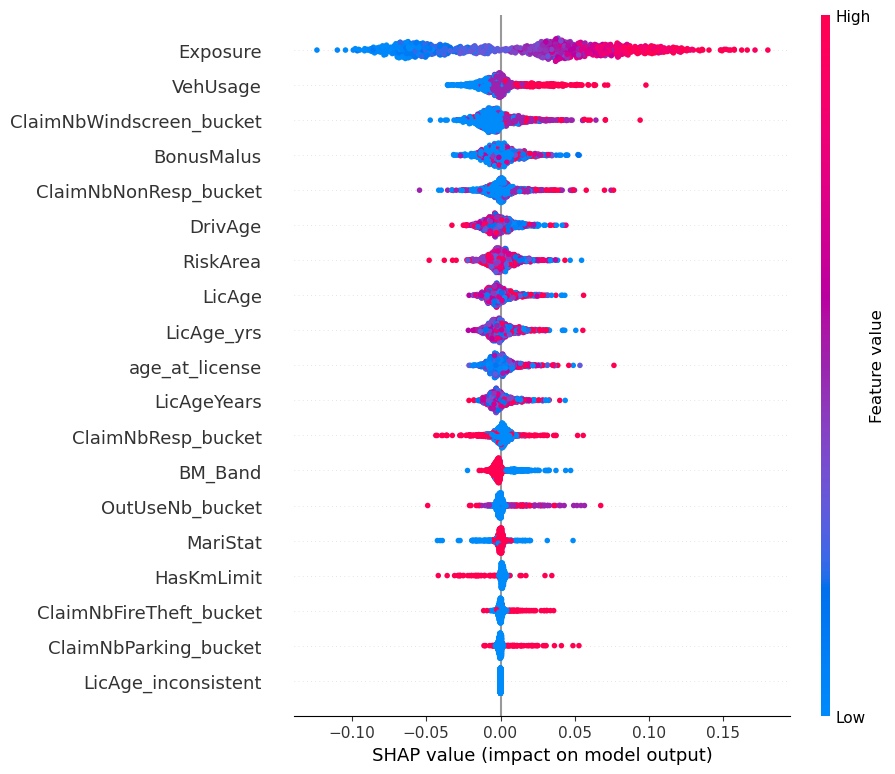

First fraudulent ClaimIds: [33216, 4660, 15094, 27243, 41013, 2143, 238, 20890, 14316, 1214] ...

=== Local SHAP | ClaimId=33216 | True Fraud ===


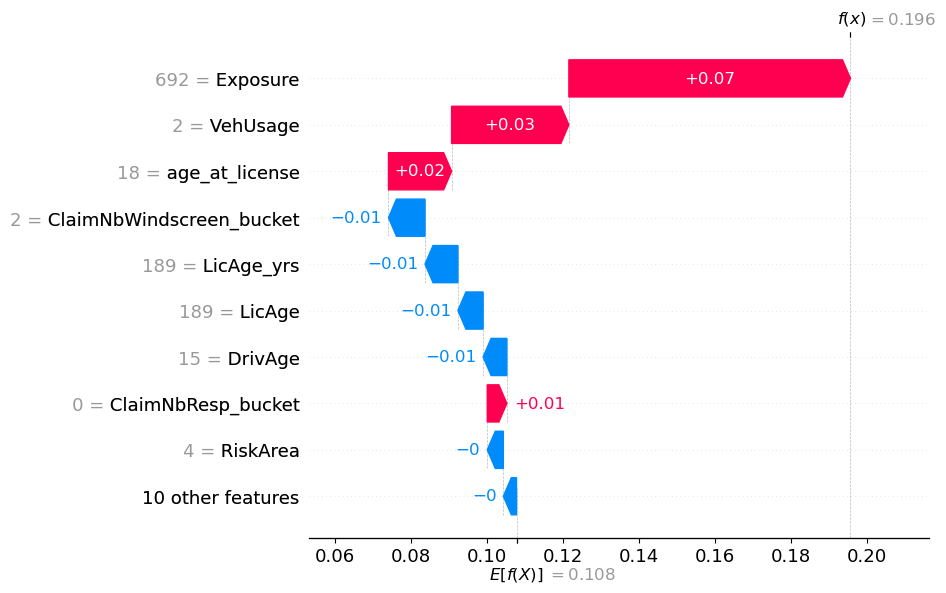


=== Local SHAP | ClaimId=4660 | True Fraud ===


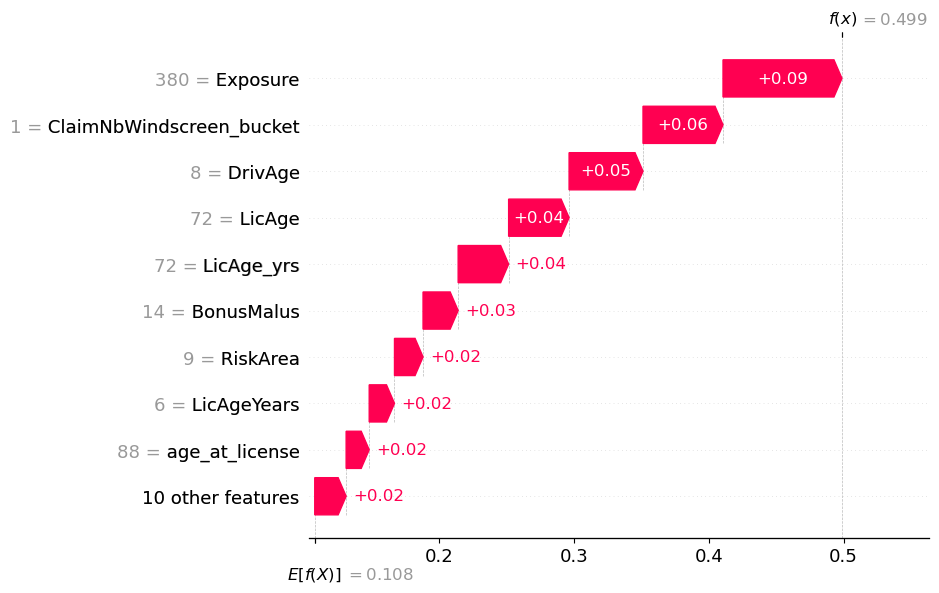


=== Local SHAP | ClaimId=15094 | True Fraud ===


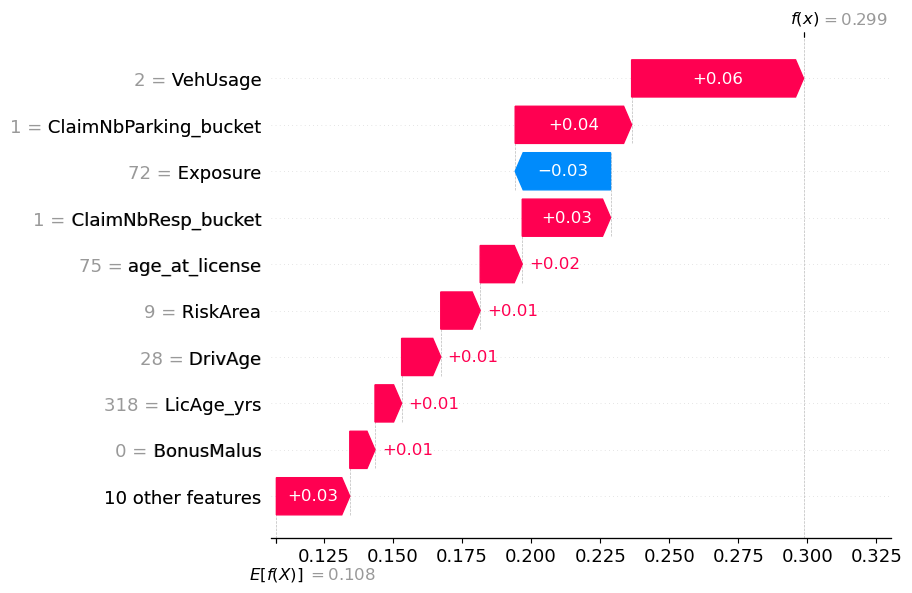


=== Local SHAP | ClaimId=27243 | True Fraud ===


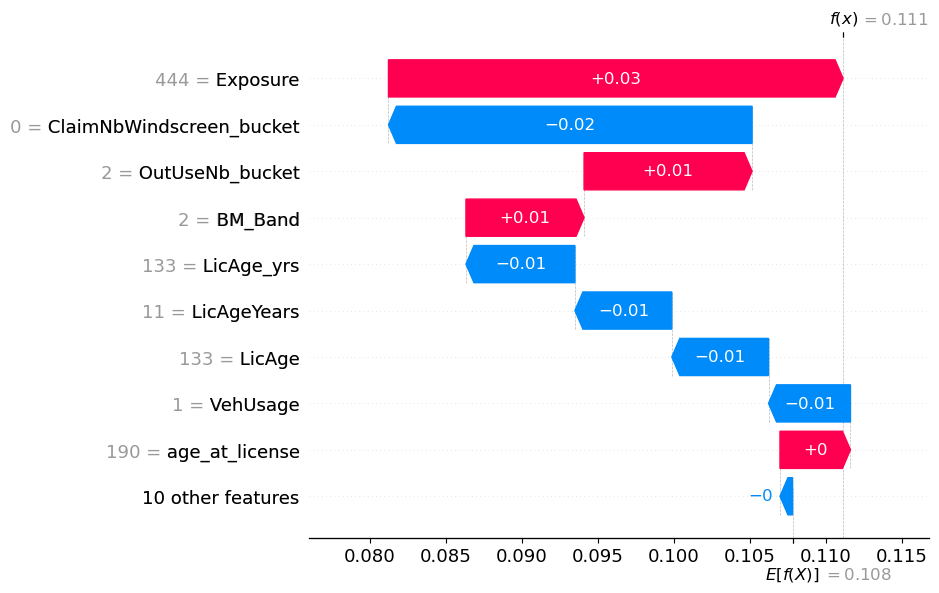


=== Local SHAP | ClaimId=41013 | True Fraud ===


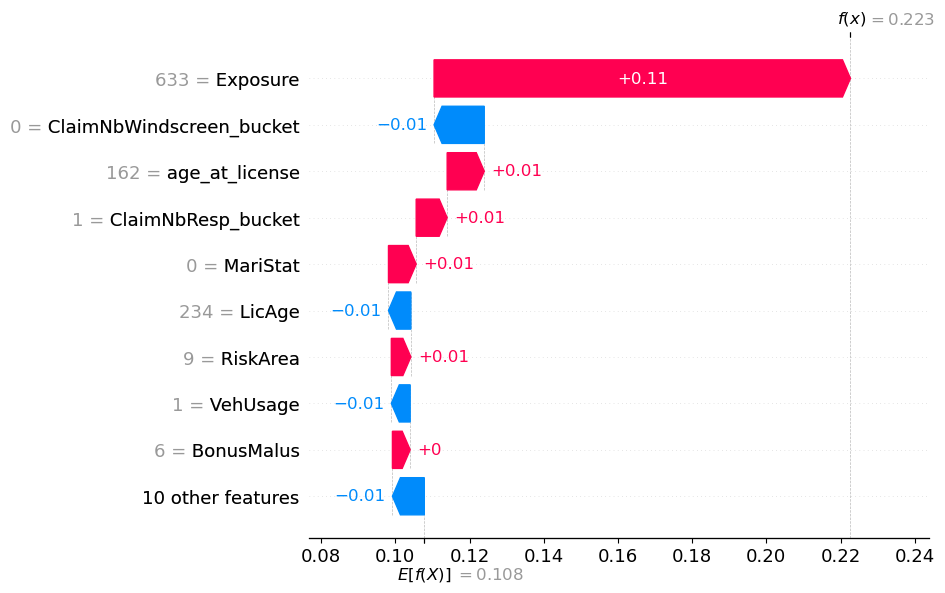

In [153]:
# 1) Fitted pieces
prep = pipe_rf.named_steps["encoder"]
rf_model = pipe_rf.named_steps["clf"]

# 2) Encode with same encoder
X_train_enc = prep.transform(X_train)
X_val_enc   = prep.transform(X_val)

X_train_df = pd.DataFrame(
    X_train_enc.toarray() if sparse.issparse(X_train_enc) else X_train_enc,
    columns=X.columns
)
X_val_df = pd.DataFrame(
    X_val_enc.toarray() if sparse.issparse(X_val_enc) else X_val_enc,
    columns=X.columns
)

# 3) Build explainer on a background sample (speed)
bg = X_train_df.sample(min(2000, len(X_train_df)), random_state=42)
explainer = shap.Explainer(rf_model, bg)

# ---------- Global (class 1 only) ----------
sv_global_full = explainer(X_val_df.sample(min(1000, len(X_val_df)), random_state=42))

def select_class(expl: shap.Explanation, class_idx=1) -> shap.Explanation:
    """Reduce a multi-output Explanation to a single class."""
    vals = expl.values
    # Detect layout: (n, f) or (n, f, c) or (n, c, f)
    if vals.ndim == 2:
        # Already single-output
        return expl
    elif vals.ndim == 3:
        # Try to guess axis: choose the axis of length equal to #classes
        axes = vals.shape
        if axes[1] == len(np.atleast_1d(expl.base_values)[0]) or axes[1] in (2,3,4,5):
            # (n, c, f)
            new_vals = vals[:, class_idx, :]
        else:
            # (n, f, c)
            new_vals = vals[:, :, class_idx]
        # base_values shape (n, c) -> take class_idx
        if np.ndim(expl.base_values) == 2:
            new_base = expl.base_values[:, class_idx]
        else:
            # sometimes it's scalar per row already
            new_base = expl.base_values
        return shap.Explanation(
            values=new_vals,
            base_values=new_base,
            data=expl.data,
            feature_names=expl.feature_names
        )
    else:
        raise ValueError("Unexpected SHAP values dimensionality.")

sv_global_c1 = select_class(sv_global_full, class_idx=1)
shap.plots.beeswarm(sv_global_c1, max_display=20, show=True)

# ---------- Local (fraud cases only, class 1) ----------
fraud_idx = np.where(y_val.values == 1)[0]
print("First fraudulent ClaimIds:", X_val.iloc[fraud_idx].index.tolist()[:10], "...")

sv_local_full = explainer(X_val_df.iloc[fraud_idx[:5]])  # explain a few frauds
sv_local_c1   = select_class(sv_local_full, class_idx=1)

for i in range(len(sv_local_c1)):
    cid = X_val.iloc[fraud_idx[i]].name
    print(f"\n=== Local SHAP | ClaimId={cid} | True Fraud ===")
    shap.plots.waterfall(sv_local_c1[i], max_display=10, show=True)

- XGBoost with Optuna Hyperparameter tuning iwth SMOTE

[I 2025-09-05 01:18:08,229] A new study created in memory with name: xgb_pr_auc


Train size: (29678, 19) Fraud rate: 0.099
Val size: (6362, 19) Fraud rate: 0.099
Test size: (6360, 19) Fraud rate: 0.099
scale_pos_weight ≈ 9.06


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-09-05 01:18:18,947] Trial 0 finished with value: 0.2514190391328721 and parameters: {'n_estimators': 1107, 'learning_rate': 0.12379350028876132, 'max_depth': 5, 'min_child_weight': 6, 'subsample': 0.8076648445093111, 'colsample_bytree': 0.9058759242927366, 'gamma': 0.48678427591536566, 'reg_lambda': 6.4939821433194, 'reg_alpha': 0.4834464229931845}. Best is trial 0 with value: 0.2514190391328721.
[I 2025-09-05 01:18:26,915] Trial 1 finished with value: 0.19315072840177894 and parameters: {'n_estimators': 1092, 'learning_rate': 0.061433227776124574, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.6247605213395048, 'colsample_bytree': 0.787380420245338, 'gamma': 2.8361824217191165, 'reg_lambda': 0.8058584537188753, 'reg_alpha': 1.9029515848872975}. Best is trial 0 with value: 0.2514190391328721.
[I 2025-09-05 01:18:31,608] Trial 2 finished with value: 0.18280571584378127 and parameters: {'n_estimators': 355, 'learning_rate': 0.1361545256109264, 'max_depth': 4, 'min_child_we

c:\Users\Source\.conda\envs\py\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VAL — ROC-AUC: 0.729 | PR-AUC: 0.426
VAL — Precision: 0.484 | Recall: 0.381 | F1: 0.427
VAL — Confusion matrix [[TN, FP],[FN, TP]]:
 [[5473  257]
 [ 391  241]]
[VAL F2 max] thr=0.085 | Precision=0.238 | Recall=0.551 | F2=0.436
[VAL F3 max] thr=0.001 | Precision=0.117 | Recall=0.915 | F3=0.543


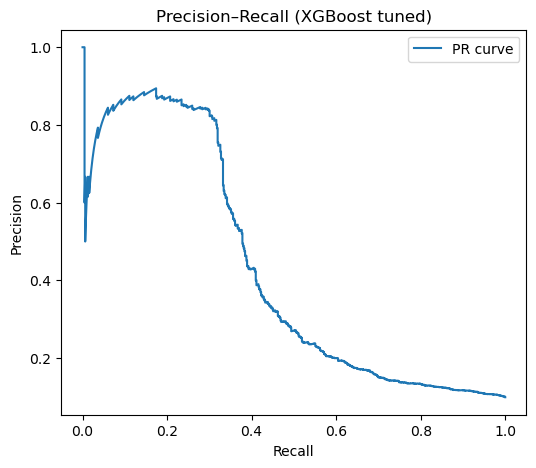

In [154]:
# -------------------
# 1) Stratified split (reuse your cleaned X, y)
# -------------------
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42
)

print("Train size:", X_train.shape, "Fraud rate:", y_train.mean().round(3))
print("Val size:",   X_val.shape,   "Fraud rate:", y_val.mean().round(3))
print("Test size:",  X_test.shape,  "Fraud rate:", y_test.mean().round(3))

cat_features = [c for c in X.columns if str(X[c].dtype) == "category"]
num_features = [c for c in X.columns if c not in cat_features]

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# class imbalance weight from training split
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"scale_pos_weight ≈ {scale_pos_weight:.2f}")

# -------------------
# 2) Optuna objective (optimize PR-AUC via CV)
# -------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

def build_pipeline(params, n_jobs_estimator=1):
    xgb = XGBClassifier(
        n_estimators=int(params["n_estimators"]),
        learning_rate=params["learning_rate"],
        max_depth=int(params["max_depth"]),
        min_child_weight=params["min_child_weight"],
        subsample=params["subsample"],
        colsample_bytree=params["colsample_bytree"],
        gamma=params["gamma"],
        reg_lambda=params["reg_lambda"],
        reg_alpha=params["reg_alpha"],
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss",
        n_jobs=n_jobs_estimator,
        scale_pos_weight=scale_pos_weight
    )
    pipe = ImbPipeline(steps=[
        ("encoder", encoder),
        ("smote", SMOTE(random_state=42, sampling_strategy=0.5)),
        ("clf", xgb)
    ])
    return pipe

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
        "learning_rate": trial.suggest_float("learning_rate", 0.02, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 6),
        "subsample": trial.suggest_float("subsample", 0.6, 0.95),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.95),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 10.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
    }

    pipe = build_pipeline(params, n_jobs_estimator=1)  # avoid CPU over-subscription during CV
    # average_precision = PR-AUC
    scores = cross_val_score(
        pipe, X_train, y_train,
        scoring="average_precision",
        cv=cv,
        n_jobs=-1
    )
    return float(np.mean(scores))

study = optuna.create_study(direction="maximize", study_name="xgb_pr_auc")
study.optimize(objective, n_trials=40, show_progress_bar=True)  # start with 40; increase if needed
print("Best PR-AUC (CV):", study.best_value)
print("Best params:", study.best_params)

# -------------------
# 3) Refit best pipeline on full TRAIN and evaluate on VAL
# -------------------
best_pipe = build_pipeline(study.best_params, n_jobs_estimator=-1)
best_pipe.fit(X_train, y_train)

val_probs = best_pipe.predict_proba(X_val)[:, 1]
val_pred05 = (val_probs >= 0.5).astype(int)

roc = roc_auc_score(y_val, val_probs)
pr_auc = average_precision_score(y_val, val_probs)
prec = precision_score(y_val, val_pred05)
rec  = recall_score(y_val, val_pred05)
f1   = f1_score(y_val, val_pred05)
cm   = confusion_matrix(y_val, val_pred05)

print(f"VAL — ROC-AUC: {roc:.3f} | PR-AUC: {pr_auc:.3f}")
print(f"VAL — Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
print("VAL — Confusion matrix [[TN, FP],[FN, TP]]:\n", cm)

# -------------------
# 4) Precision–Recall curve + F2/F3 thresholds (recall-first)
# -------------------
precisions, recalls, thresholds = precision_recall_curve(y_val, val_probs)
thresholds = np.append(thresholds, 1.0)

def best_fbeta(beta=2.0):
    denom = (beta**2)*precisions + recalls
    denom[denom == 0] = 1e-12
    fbeta = (1+beta**2)*(precisions*recalls)/denom
    i = np.argmax(fbeta)
    return thresholds[i], precisions[i], recalls[i], fbeta[i]

for beta in [2, 3]:
    thr, prc, rcl, fbeta = best_fbeta(beta)
    print(f"[VAL F{beta} max] thr={thr:.3f} | Precision={prc:.3f} | Recall={rcl:.3f} | F{beta}={fbeta:.3f}")

# Plot PR curve
plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, label="PR curve")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall (XGBoost tuned)")
plt.legend(); plt.show()

 99%|===================| 992/1000 [01:35<00:00]        

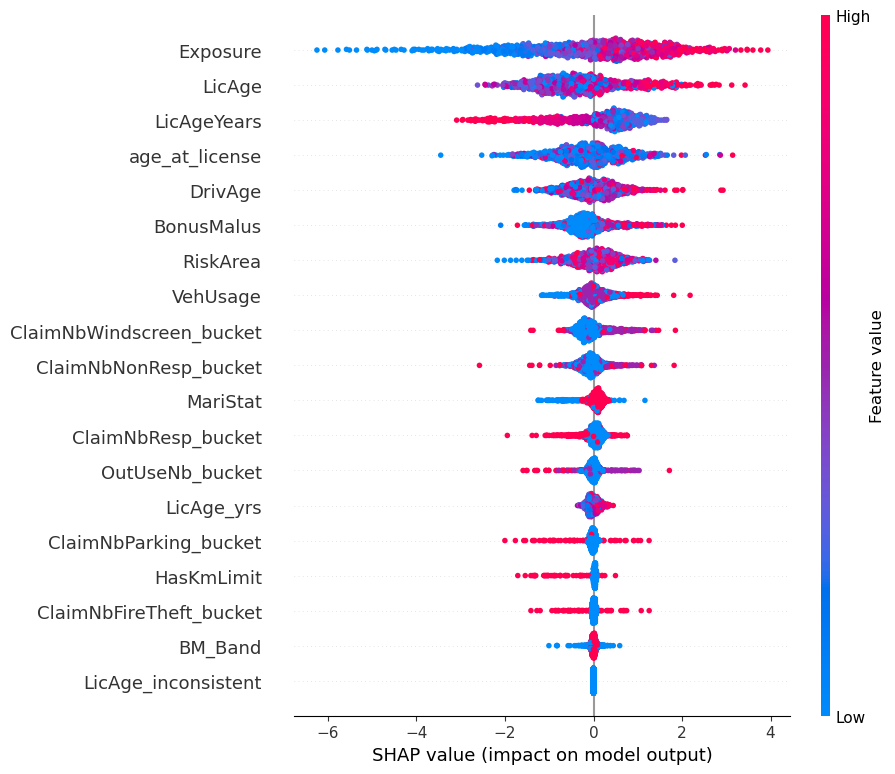

Fraudulent ClaimIds (val): [33216, 4660, 15094, 27243, 41013, 2143, 238, 20890, 14316, 1214] ...

=== Local SHAP | ClaimId=33216 | True Fraud ===


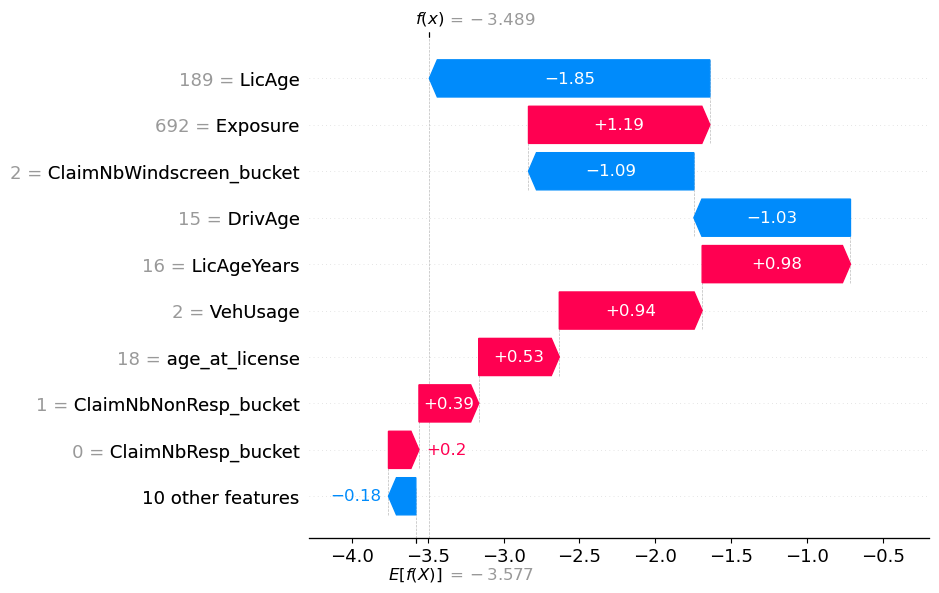


=== Local SHAP | ClaimId=4660 | True Fraud ===


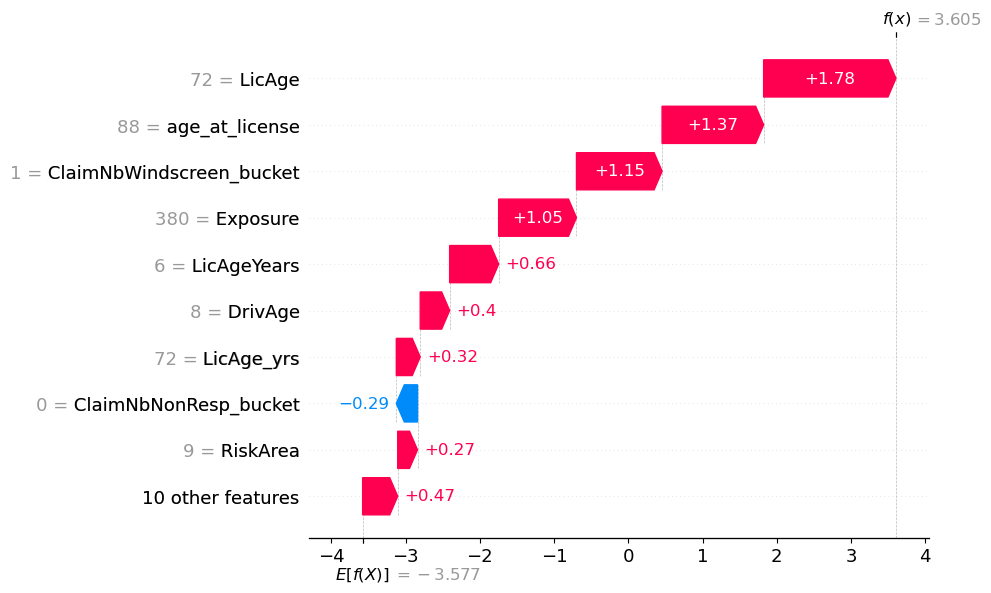


=== Local SHAP | ClaimId=15094 | True Fraud ===


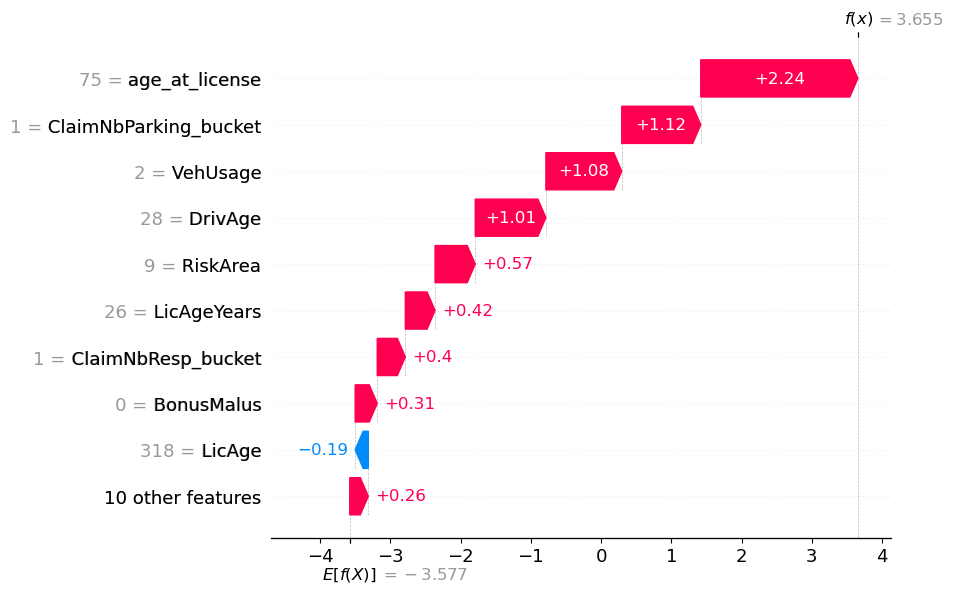


=== Local SHAP | ClaimId=27243 | True Fraud ===


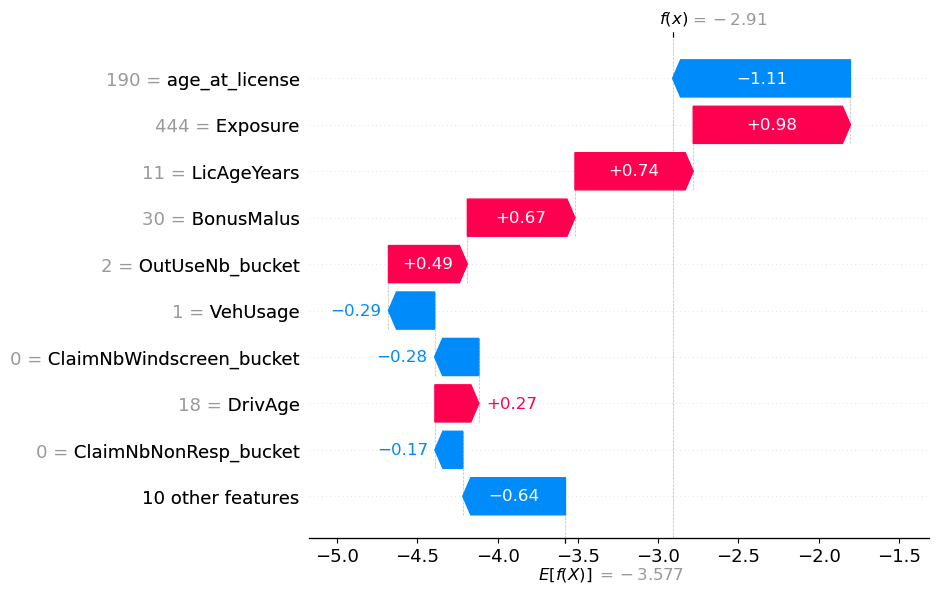


=== Local SHAP | ClaimId=41013 | True Fraud ===


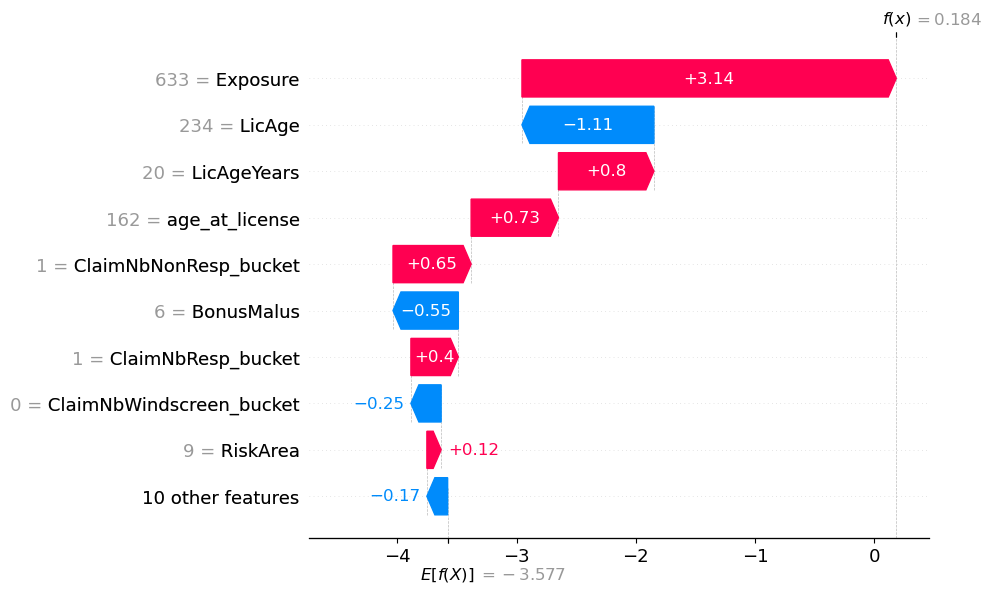

In [155]:
# -------------------
# 5) SHAP — global + local (fraud-only) for interpretation
# -------------------
prep = best_pipe.named_steps["encoder"]
xgb_model = best_pipe.named_steps["clf"]

X_val_enc = prep.transform(X_val)
X_val_enc_dense = X_val_enc.toarray() if sparse.issparse(X_val_enc) else X_val_enc

# Convert to DataFrame with feature names
X_val_df = pd.DataFrame(X_val_enc_dense, columns=X.columns)

# Build explainer with feature names
explainer = shap.Explainer(xgb_model, X_val_df)

# Global SHAP
sv_global = explainer(X_val_df.sample(min(1000, len(X_val_df)), random_state=42))
shap.plots.beeswarm(sv_global, max_display=20, show=True)

# Local SHAP (fraud-only)
fraud_idx = np.where(y_val.values == 1)[0]
print("Fraudulent ClaimIds (val):", X_val.iloc[fraud_idx].index.tolist()[:10], "...")

sv_local = explainer(X_val_df.iloc[fraud_idx[:5]])
for i in range(len(sv_local)):
    cid = X_val.iloc[fraud_idx[i]].name
    print(f"\n=== Local SHAP | ClaimId={cid} | True Fraud ===")
    shap.plots.waterfall(sv_local[i], max_display=10, show=True)

In [156]:
# =========================
# Final Test Set Evaluation
# =========================

# 1) Get predicted probabilities on the test set
test_probs = best_pipe.predict_proba(X_test)[:, 1]

# 2) Reuse thresholds from validation
thr_f2, _, _, _ = best_fbeta(beta=2.0)
thr_f3, _, _, _ = best_fbeta(beta=3.0)

def evaluate_threshold(y_true, y_scores, thresh, label=""):
    preds = (y_scores >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
    roc = roc_auc_score(y_true, y_scores)
    pr  = average_precision_score(y_true, y_scores)
    prec = precision_score(y_true, preds)
    rec  = recall_score(y_true, preds)
    f1   = f1_score(y_true, preds)
    print(f"\n[{label}] thr={thresh:.3f}")
    print(f"ROC-AUC={roc:.3f} | PR-AUC={pr:.3f}")
    print(f"Precision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f}")
    print("Confusion matrix [[TN, FP],[FN, TP]]:")
    print([[tn, fp],[fn, tp]])
    return {"label": label, "threshold": thresh, "roc": roc, "pr": pr,
            "precision": prec, "recall": rec, "f1": f1,
            "tn": tn, "fp": fp, "fn": fn, "tp": tp}

# 3) Evaluate F2 and F3 thresholds
res_f2 = evaluate_threshold(y_test, test_probs, thr_f2, "Test F2 threshold")
res_f3 = evaluate_threshold(y_test, test_probs, thr_f3, "Test F3 threshold")

# Optional: collect in a DataFrame for reporting
import pandas as pd
final_results = pd.DataFrame([res_f2, res_f3])
display(final_results)



[Test F2 threshold] thr=0.085
ROC-AUC=0.748 | PR-AUC=0.478
Precision=0.246 | Recall=0.565 | F1=0.343
Confusion matrix [[TN, FP],[FN, TP]]:
[[4635, 1093], [275, 357]]

[Test F3 threshold] thr=0.001
ROC-AUC=0.748 | PR-AUC=0.478
Precision=0.116 | Recall=0.922 | F1=0.206
Confusion matrix [[TN, FP],[FN, TP]]:
[[1291, 4437], [49, 583]]


,label,threshold,roc,pr,precision,recall,f1,tn,fp,fn,tp
0,Test F2 threshold,0.084679,0.748386,0.478077,0.246207,0.564873,0.342939,4635,1093,275,357
1,Test F3 threshold,0.001271,0.748386,0.478077,0.116135,0.922468,0.206299,1291,4437,49,583


## Dashboard

- Global and Local Feature Importance

In [157]:
import os
from datetime import date
from hashlib import md5

In [168]:
# ---------- Helpers ----------
def _to_df(arr, columns):
    """Ensure numpy/sparse -> DataFrame with proper feature names."""
    if sparse.issparse(arr):
        arr = arr.toarray()
    return pd.DataFrame(arr, columns=columns)

def export_xgb_shap_tables(
    pipe, X_train, X_val, y_val,
    global_sample=2000, local_topk=5,
    global_csv="xgb_global_shap_importance.csv",
    local_csv="xgb_local_shap_top5_frauds.csv"
):
    # 1) Encode using the SAME fitted encoder in the pipeline
    enc = pipe.named_steps["encoder"]
    model = pipe.named_steps["clf"]

    X_train_enc = enc.transform(X_train)
    X_val_enc   = enc.transform(X_val)

    # Get feature names safely from encoder
    try:
        feature_names = enc.get_feature_names_out()
    except Exception:
        feature_names = X_train.columns.tolist()

    X_train_df = _to_df(X_train_enc, feature_names)
    X_val_df   = _to_df(X_val_enc,   feature_names)

    # 2) Build SHAP explainer (TreeExplainer via auto-detection)
    bg_n = min(global_sample, len(X_train_df))
    explainer = shap.Explainer(model, X_train_df.sample(bg_n, random_state=42))

    # ---------- Global SHAP ----------
    val_n = min(global_sample, len(X_val_df))
    sv_global = explainer(X_val_df.sample(val_n, random_state=42))   # Explanation object

    global_importance = pd.DataFrame({
        "Feature": sv_global.feature_names,
        "MeanAbsSHAP": np.abs(sv_global.values).mean(axis=0)
    })
    global_importance.to_csv(global_csv, index=False)
    print(f"Saved global importance → {global_csv}")

    # ---------- Local SHAP (frauds only, top-k reasons per claim) ----------
    fraud_idx = np.where(y_val.values == 1)[0]
    val_probs = pipe.predict_proba(X_val)[:, 1]

    rows = []
    sv_local = explainer(X_val_df.iloc[fraud_idx])

    for row_i, val_i in enumerate(fraud_idx):
        shap_vals_row = sv_local.values[row_i]
        order = np.argsort(-np.abs(shap_vals_row))[:local_topk]

        for rank, j in enumerate(order, start=1):
            feat = sv_local.feature_names[j]
            # Use raw_value only if present in original data
            raw_val = None
            if feat in X_val.columns:
                raw_val = X_val.iloc[val_i][feat]

            rows.append({
                "ClaimId": X_val.index[val_i],
                "rank": rank,
                "Feature": feat,
                "raw_value": raw_val,
                "encoded_value": X_val_df.iloc[val_i, j],
                "shap_value": float(shap_vals_row[j]),
                "abs_shap": float(abs(shap_vals_row[j])),
                "fraud_score": float(val_probs[val_i]),
                "y_true": int(y_val.iloc[val_i])
            })

    local_top = pd.DataFrame(rows).sort_values(["ClaimId", "rank"]).reset_index(drop=True)
    local_top.to_csv(local_csv, index=False)
    print(f"Saved local fraud explanations → {local_csv}")

    return global_importance, local_top

# ---------- Run export for the tuned XGBoost pipeline ----------
global_imp_df, local_fraud_df = export_xgb_shap_tables(
    best_pipe, X_train, X_val, y_val,
    global_sample=2000,
    local_topk=5,
    global_csv="xgb_global_shap_importance.csv",
    local_csv="xgb_local_shap_top5_frauds.csv"
)

# Quick peeks (optional)
display(global_imp_df.head(15))      # For Top-N in dashboard (N=5/10/15…)
display(local_fraud_df.head(20))     # Per-claim top reasons


 99%|===================| 1988/2000 [02:55<00:01]        

Saved global importance → xgb_global_shap_importance.csv


100%|===================| 631/632 [00:40<00:00]        

Saved local fraud explanations → xgb_local_shap_top5_frauds.csv


,Feature,MeanAbsSHAP
0,Exposure,1.414477
1,LicAge,0.849375
2,MariStat,0.139892
3,VehUsage,0.260348
4,DrivAge,0.397789
5,HasKmLimit,0.112010
6,RiskArea,0.387129
7,BonusMalus,0.374951
8,LicAge_yrs,0.098030
9,age_at_license,0.597745


,ClaimId,rank,Feature,raw_value,encoded_value,shap_value,abs_shap,fraud_score,y_true
0,42,1,Exposure,0.472,360.0,2.101635,2.101635,0.981307,1
1,42,2,age_at_license,23.666667,165.0,1.552881,1.552881,0.981307,1
2,42,3,LicAge,412,388.0,1.424843,1.424843,0.981307,1
3,42,4,DrivAge,58,38.0,1.275086,1.275086,0.981307,1
4,42,5,RiskArea,9,8.0,0.686469,0.686469,0.981307,1
5,67,1,Exposure,0.666,509.0,1.010693,1.010693,0.097549,1
6,67,2,LicAgeYears,25,23.0,0.898328,0.898328,0.097549,1
7,67,3,VehUsage,Professional,2.0,0.825707,0.825707,0.097549,1
8,67,4,LicAge,301,277.0,-0.779564,0.779564,0.097549,1
9,67,5,BonusMalus,61,11.0,0.455827,0.455827,0.097549,1


In [222]:
import os
import numpy as np
import pandas as pd
from scipy import sparse
import shap
from hashlib import md5
from datetime import date

# ------------ Helper: safe to DataFrame with names ------------
def _to_df(arr, columns):
    from scipy import sparse as sp
    if sp.issparse(arr):
        arr = arr.toarray()
    return pd.DataFrame(arr, columns=columns)

# ------------ 0) Base inputs ------------
base_df = X.copy()
if "ClaimId" in base_df.columns:
    base_df = base_df.set_index("ClaimId")
base_df.index.name = "ClaimId"

# attach target
y_series = y.copy()
if "ClaimId" not in (y_series.index.names or []):
    y_series.index = base_df.index
y_series.name = "IsFraud"

# Optional business columns
optional_cols = [
    "VehUsage","RiskArea","DriverAgeBand","DrivAge","BonusMalus","BM_Band",
    "Exposure_binned","MariStat","HasKmLimit"
]
present_cols = [c for c in optional_cols if c in base_df.columns]

# Optional date column
date_col = "ClaimDate" if "ClaimDate" in base_df.columns else None

# ------------ 1) FactClaims (NO ClaimAmount) ------------
# Start from modeling base with ClaimId as index
fact_claims = base_df.copy()[present_cols]
fact_claims["IsFraud"] = y_series

# Bring ClaimId out as a column (string key)
fact_claims = fact_claims.reset_index(drop=False)
fact_claims["ClaimId"] = fact_claims["ClaimId"].astype(str).str.strip()

# Attach ClaimDate (or synthesize if missing)
if "ClaimDate" in base_df.columns:
    # Align index->column safely
    claim_dates = pd.to_datetime(base_df["ClaimDate"], errors="coerce")
    fact_claims["ClaimDate"] = claim_dates.values
else:
    # Synthetic dates over the last 18 months (for timelines)
    rng = np.random.default_rng(42)
    end = pd.Timestamp(date.today())
    start = end - pd.DateOffset(months=18)
    synth_dates = pd.to_datetime(
        rng.integers(start.value // 10**9, end.value // 10**9, size=len(fact_claims)),
        unit="s"
    ).normalize()
    fact_claims["ClaimDate"] = synth_dates

# Ensure column order is tidy (optional)
cols_first = ["ClaimId", "ClaimDate", "IsFraud"]
other_cols = [c for c in fact_claims.columns if c not in cols_first]
fact_claims = fact_claims[cols_first + other_cols]

# Save (NO ClaimAmount column)
fact_claims.to_csv("FactClaims.csv", index=False)
print("✔️ FactClaims.csv", fact_claims.shape)

# ------------ 2) FactModelScores ------------
fraud_scores = best_pipe.predict_proba(X)[:, 1]
model_version = "XGB_optuna_smote_" + md5(
    str(best_pipe.named_steps["clf"].get_params()).encode()
).hexdigest()[:8]
scored_date = pd.Timestamp(date.today())

fact_scores = pd.DataFrame({
    "ClaimId": fact_claims["ClaimId"],
    "ScoredDate": scored_date.normalize(),
    "ModelVersion": model_version,
    "FraudScore": fraud_scores
})
fact_scores.to_csv("FactModelScores.csv", index=False)
print("✔️ FactModelScores.csv", fact_scores.shape)

# ------------ 3) DimFeature + FactLocalReasons (and aggregated) ------------
need_global = True
need_local  = True
if os.path.exists("xgb_global_shap_importance.csv"):
    global_imp_df = pd.read_csv("xgb_global_shap_importance.csv")
    need_global = False
if os.path.exists("xgb_local_shap_top5_frauds.csv"):
    local_fraud_df = pd.read_csv("xgb_local_shap_top5_frauds.csv")
    need_local = False

if need_global or need_local:
    enc = best_pipe.named_steps["encoder"]
    X_enc = enc.transform(X)
    try:
        feat_names = enc.get_feature_names_out()
    except Exception:
        feat_names = X.columns.tolist()
    X_df  = _to_df(X_enc, feat_names)

    explainer = shap.Explainer(
        best_pipe.named_steps["clf"],
        X_df.sample(min(2000, len(X_df)), random_state=42)
    )

    if need_global:
        sv_global = explainer(X_df.sample(min(2000, len(X_df)), random_state=42))
        global_imp_df = (
            pd.DataFrame({
                "Feature": sv_global.feature_names,
                "MeanAbsSHAP": np.abs(sv_global.values).mean(axis=0)
            })
            .sort_values("MeanAbsSHAP", ascending=False)
            .reset_index(drop=True)
        )
        global_imp_df.to_csv("xgb_global_shap_importance.csv", index=False)
        print("✔️ xgb_global_shap_importance.csv", global_imp_df.shape)

    if need_local:
        y_all = y_series.reindex(X_df.index)
        fraud_idx = np.where(y_all.values == 1)[0]
        sv_local = explainer(X_df.iloc[fraud_idx])

        rows = []
        val_probs_all = fraud_scores
        for row_i, val_i in enumerate(fraud_idx):
            shap_vals_row = sv_local.values[row_i]
            order = np.argsort(-np.abs(shap_vals_row))[:5]
            for rank, j in enumerate(order, start=1):
                feat = sv_local.feature_names[j]
                rows.append({
                    "ClaimId": base_df.index[val_i],
                    "rank": rank,
                    "Feature": feat,
                    "raw_value": None if feat not in X.columns else X.iloc[val_i][feat],
                    "encoded_value": X_df.iloc[val_i, j],
                    "shap_value": float(shap_vals_row[j]),
                    "abs_shap": float(abs(shap_vals_row[j])),
                    "fraud_score": float(val_probs_all[val_i]),
                    "y_true": int(y_all.iloc[val_i])
                })
        local_fraud_df = pd.DataFrame(rows).sort_values(["ClaimId","rank"])
        local_fraud_df.to_csv("xgb_local_shap_top5_frauds.csv", index=False)
        print("✔️ xgb_local_shap_top5_frauds.csv", local_fraud_df.shape)

# ---- Normalize global/local SHAP column names ----
global_imp_df.columns = [c.strip() for c in global_imp_df.columns]
if "FeatureName" not in global_imp_df.columns:
    if "Feature" in global_imp_df.columns:
        global_imp_df = global_imp_df.rename(columns={"Feature": "FeatureName"})
    elif "feature" in global_imp_df.columns:
        global_imp_df = global_imp_df.rename(columns={"feature": "FeatureName"})
if "MeanAbsSHAP" not in global_imp_df.columns:
    if "mean_abs_shap" in global_imp_df.columns:
        global_imp_df = global_imp_df.rename(columns={"mean_abs_shap": "MeanAbsSHAP"})

local_fraud_df.columns = [c.strip() for c in local_fraud_df.columns]
if "FeatureName" not in local_fraud_df.columns:
    if "Feature" in local_fraud_df.columns:
        local_fraud_df = local_fraud_df.rename(columns={"Feature": "FeatureName"})
    elif "feature" in local_fraud_df.columns:
        local_fraud_df = local_fraud_df.rename(columns={"feature": "FeatureName"})

# Build DimFeature
dim_feature = global_imp_df.copy()
dim_feature["FeatureKey"] = dim_feature["FeatureName"].astype("category").cat.codes + 1
dim_feature["FriendlyLabel"] = (
    dim_feature["FeatureName"].astype(str)
    .str.replace("_"," ").str.replace(r"\s+"," ", regex=True)
    .str.strip().str.title()
)
dim_feature["Group"] = np.where(dim_feature["FeatureName"].str.contains("Age|Driv", case=False), "Driver",
                         np.where(dim_feature["FeatureName"].str.contains("Veh|Usage|Km", case=False), "Vehicle",
                         np.where(dim_feature["FeatureName"].str.contains("Risk|Area|Region", case=False), "Geography","Other")))
dim_feature = dim_feature[["FeatureKey","FeatureName","FriendlyLabel","Group","MeanAbsSHAP"]]
dim_feature.to_csv("DimFeature.csv", index=False)
print("✔️ DimFeature.csv", dim_feature.shape)

# Map FeatureKey into FactLocalReasons
feat_map = dim_feature.set_index("FeatureName")["FeatureKey"].to_dict()
fact_local = local_fraud_df.copy()
fact_local["FeatureKey"] = fact_local["FeatureName"].map(feat_map)

keep_cols = [
    "ClaimId","FeatureKey","rank",
    "shap_value","abs_shap","raw_value","encoded_value","fraud_score","y_true"
]
fact_local = fact_local[keep_cols].sort_values(["ClaimId","rank"]).reset_index(drop=True)
fact_local.to_csv("FactLocalReasons.csv", index=False)
print("✔️ FactLocalReasons.csv", fact_local.shape)

# ---- Aggregated local reasons ----
def _fmt_reason(r):
    return f"{r['FeatureName']} ({r['shap_value']:.2f})"

agg_rows = []
for cid, grp in local_fraud_df.groupby("ClaimId", sort=False):
    grp = grp.sort_values("rank")
    reasons = ", ".join(_fmt_reason(r) for _, r in grp.iterrows())
    agg_rows.append({
        "ClaimId": cid,
        "TopReasons": reasons,
        "FraudScore": float(grp["fraud_score"].iloc[0])
    })

local_agg = pd.DataFrame(agg_rows).sort_values("FraudScore", ascending=False)
local_agg.to_csv("FactLocalReasonsAgg.csv", index=False)
print("✔️ FactLocalReasonsAgg.csv", local_agg.shape)

# ------------ 4) DimDate (calendar) ------------
d1 = fact_claims["ClaimDate"].min()
d2 = fact_claims["ClaimDate"].max()
d3 = fact_scores["ScoredDate"].min()
d4 = fact_scores["ScoredDate"].max()
d_min = min(d1, d3)
d_max = max(d2, d4)

if pd.isna(d_min) or pd.isna(d_max):
    d_max = pd.Timestamp(date.today()).normalize()
    d_min = d_max - pd.DateOffset(months=24)

dim_date = pd.DataFrame({"Date": pd.date_range(d_min.normalize(), d_max.normalize(), freq="D")})
dim_date["Year"] = dim_date["Date"].dt.year
dim_date["Month"] = dim_date["Date"].dt.month
dim_date["MonthName"] = dim_date["Date"].dt.strftime("%b")
dim_date["YearMonth"] = dim_date["Date"].dt.strftime("%Y-%m")
dim_date["Quarter"] = "Q" + (((dim_date["Month"] - 1)//3) + 1).astype(str)
dim_date.to_csv("DimDate.csv", index=False)
print("✔️ DimDate.csv", dim_date.shape)

# ------------ Summary ------------
print("\nFiles ready for Power BI:")
for f in ["FactClaims.csv","FactModelScores.csv","FactLocalReasons.csv","FactLocalReasonsAgg.csv","DimFeature.csv","DimDate.csv"]:
    print(" -", f)


✔️ FactClaims.csv (42400, 10)
✔️ FactModelScores.csv (42400, 4)
✔️ DimFeature.csv (19, 5)
✔️ FactLocalReasons.csv (3160, 9)
✔️ FactLocalReasonsAgg.csv (632, 3)
✔️ DimDate.csv (550, 6)

Files ready for Power BI:
 - FactClaims.csv
 - FactModelScores.csv
 - FactLocalReasons.csv
 - FactLocalReasonsAgg.csv
 - DimFeature.csv
 - DimDate.csv
